# This Case Study is divided into 3 sections
### 1. Analysis of 'application_data.csv'
### 2. Analysis of 'previous_application.csv'
### 3. Combining both datasets and then Analysing.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
%matplotlib inline

## 1. Analysis of 'application_data.csv'

In [19]:
#Reading CSV file and reading head
app_data = pd.read_csv('application_data.csv', encoding='latin1')
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [20]:
# Taking Transpose of last 4 rows of DataFrame
app_data.tail(4).T


,307507,307508,307509,307510
SK_ID_CURR,456252,456253,456254,456255
TARGET,0,0,1,0
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Cash loans,Cash loans
CODE_GENDER,F,F,F,F
FLAG_OWN_CAR,N,N,N,N
FLAG_OWN_REALTY,Y,Y,Y,N
CNT_CHILDREN,0,0,0,0
AMT_INCOME_TOTAL,72000,153000,171000,157500
AMT_CREDIT,269550,677664,370107,675000
AMT_ANNUITY,12001.5,29979,20205,49117.5


## Analysing DataFrame

In [21]:
#Shape of Data

app_data.shape

(307511, 122)

#### Info

In [22]:
# Concise summary of a DataFrame.

app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


#### Describe

In [23]:
#Generate descriptive statistics that summarize the central tendency,
# dispersion and shape of a dataset's distribution, excluding``NaN`` values.

app_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


#### Number of Unique Values

In [24]:
app_data.nunique()

SK_ID_CURR                      307511
TARGET                               2
NAME_CONTRACT_TYPE                   2
CODE_GENDER                          3
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
CNT_CHILDREN                        15
AMT_INCOME_TOTAL                  2548
AMT_CREDIT                        5603
AMT_ANNUITY                      13672
AMT_GOODS_PRICE                   1002
NAME_TYPE_SUITE                      7
NAME_INCOME_TYPE                     8
NAME_EDUCATION_TYPE                  5
NAME_FAMILY_STATUS                   6
NAME_HOUSING_TYPE                    6
REGION_POPULATION_RELATIVE          81
DAYS_BIRTH                       17460
DAYS_EMPLOYED                    12574
DAYS_REGISTRATION                15688
DAYS_ID_PUBLISH                   6168
OWN_CAR_AGE                         62
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE         

#### Data Type

In [25]:
#Checking Data Type of each column
app_data.dtypes


SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


## Missing Value Analysis

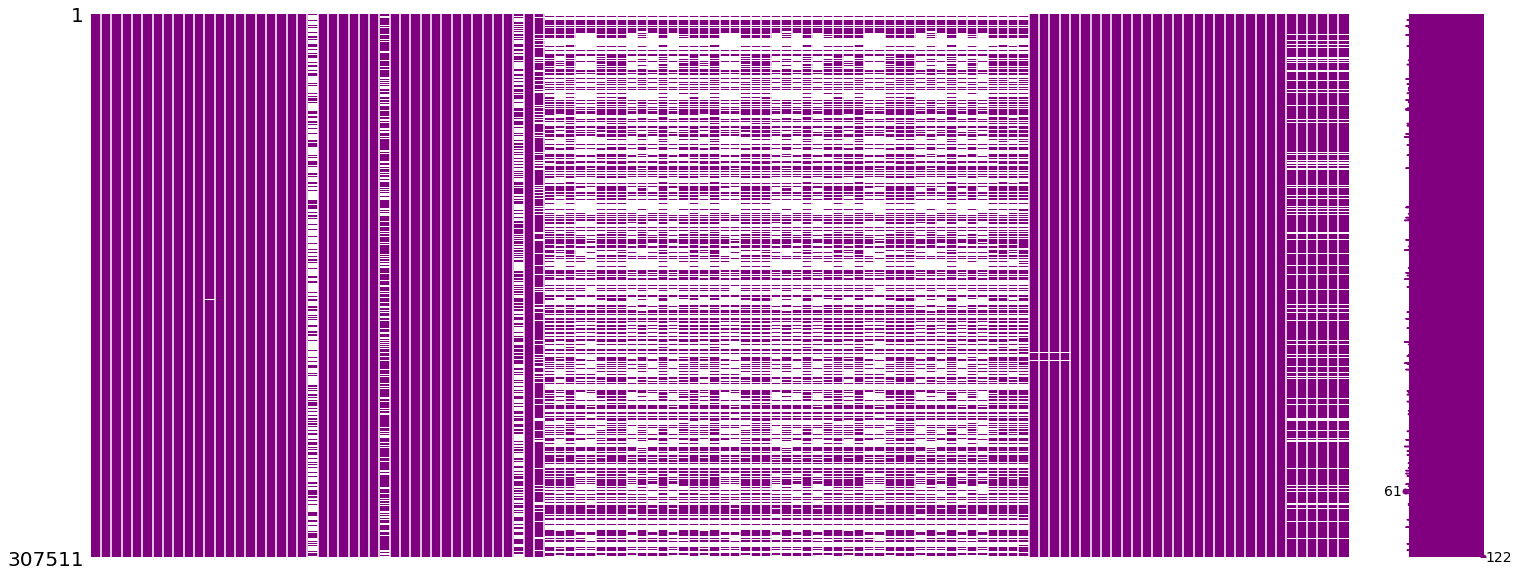

In [26]:
#Viewing Missing Values in Dataframe
# Missing values are seen in white color in each column
missingno.matrix(app_data,color = (0.5, 0.0, 0.5))

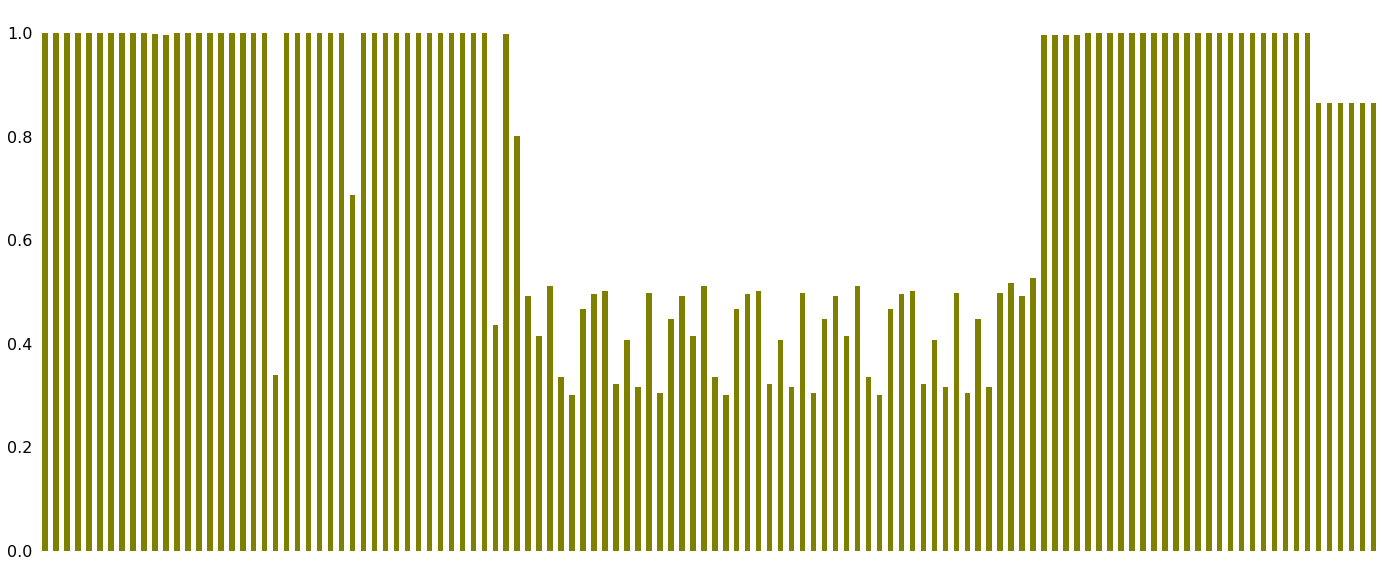

In [27]:
#Missing values in Barplot
missingno.bar(app_data, color = (0.5, 0.5, 0.0))

In [28]:
# Sorting Null Values in Descending order
app_data.isnull().sum().sort_values(ascending = False)


COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_MEDI        213514
NONLIVINGAPARTMENTS_AVG         213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
FLOORSMIN_MEDI                  208642
FLOORSMIN_MODE                  208642
FLOORSMIN_AVG                   208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_AVG                 204488
YEARS_BUILD_MODE                204488
OWN_CAR_AGE                     202929
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
LANDAREA_MEDI                   182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MEDI              169682
NONLIVINGAREA_AVG        

In [29]:
# Missing Values Row Wise in Decreasing order
app_data.isnull().sum(axis = 1).sort_values(ascending = False)

133770    61
244833    61
150206    61
69707     61
269786    61
          ..
76611      0
76606      0
181134     0
76597      0
153755     0
Length: 307511, dtype: int64

#### **Inference - Max No of missing values per row is 61**

In [30]:
# Checking No. of Rows retained after removing all rows with Null Values
drop_app1 = app_data.dropna(axis = 0)
drop_app1.shape

(8602, 122)

In [31]:
# Finding % Column wise null value in Descending order
(app_data.isnull().mean().sort_values(ascending = False)*100)


COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [32]:
# Columns with more than 46% Missing Values

(app_data.isnull().mean().sort_values(ascending = False)*100).index[:49]

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE', 'FLOORSMIN_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_AVG', 'YEARS_BUILD_MODE', 'OWN_CAR_AGE', 'LANDAREA_MODE', 'LANDAREA_AVG', 'LANDAREA_MEDI', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'ELEVATORS_MODE', 'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'WALLSMATERIAL_MODE', 'APARTMENTS_MODE', 'APARTMENTS_AVG', 'APARTMENTS_MEDI', 'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'ENTRANCES_AVG', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE', 'LIVINGAREA_AVG', 'HOUSETYPE_MODE', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'TOTALAREA_MODE',
       'EMERGE

In [33]:
# Columns with > 0% and Columns with < 32% Missing Values

(app_data.isnull().mean().sort_values(ascending = False)*100).index[49:67]

Index(['OCCUPATION_TYPE', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'NAME_TYPE_SUITE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE'], dtype='object')

In [34]:
# Columns with no missing Values

(app_data.isnull().mean().sort_values(ascending = False)*100).index[67:]

Index(['AMT_CREDIT', 'FLAG_OWN_CAR', 'FLAG_EMAIL', 'TARGET', 'FLAG_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'FLAG_MOBIL', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT', 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'CNT_CHILDREN', 'NAME_HOUSING_TYPE', 'REG_REGION_NOT_LIVE_REGION', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'ORGANIZATION_TYPE', 'LIVE_CITY_NOT_WORK_CITY',
       'REG_CITY_NOT

In [35]:
# Columns having > 46% missing values should be dropped from DataFrame

to_drop = ['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 
               'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE', 
               'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 
               'FLOORSMIN_MEDI', 'FLOORSMIN_MODE', 'FLOORSMIN_AVG', 'YEARS_BUILD_MEDI', 
               'YEARS_BUILD_AVG', 'YEARS_BUILD_MODE', 'OWN_CAR_AGE', 'LANDAREA_MODE', 
               'LANDAREA_AVG', 'LANDAREA_MEDI', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 
               'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_AVG', 
               'NONLIVINGAREA_MODE', 'ELEVATORS_MODE', 'ELEVATORS_AVG', 'ELEVATORS_MEDI', 
               'WALLSMATERIAL_MODE', 'APARTMENTS_MODE', 'APARTMENTS_AVG', 'APARTMENTS_MEDI', 
               'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'ENTRANCES_AVG', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE', 
               'LIVINGAREA_AVG', 'HOUSETYPE_MODE', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG',
               'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 
               'TOTALAREA_MODE',       'EMERGENCYSTATE_MODE']



In [36]:
app_data.drop(to_drop,axis = 1,  inplace = True)

In [37]:
app_data.shape

(307511, 73)

#### Inference - After dropping columns remaining columns are 73

### Checking and Analysing value_counts of each column

In [38]:
# Checking and Analysing value_counts of each column
col = app_data.columns.to_list()                            # Columns of DataFrame 
for j, i in enumerate(col):
    print('Column ', j, ' ',i )
    print(app_data[i].value_counts())
    print('                                     ')
    print('*************************************')
    print('                                     ')
    

Column  0   SK_ID_CURR
100303    1
131861    1
158488    1
156441    1
160539    1
         ..
255446    1
257495    1
234968    1
237017    1
100401    1
Name: SK_ID_CURR, Length: 307511, dtype: int64
                                     
*************************************
                                     
Column  1   TARGET
0    282686
1     24825
Name: TARGET, dtype: int64
                                     
*************************************
                                     
Column  2   NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
                                     
*************************************
                                     
Column  3   CODE_GENDER
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
                                     
*************************************
                                     
Column  4   FLAG_OWN_CAR
N    202924
Y    104587
Nam

Name: WEEKDAY_APPR_PROCESS_START, dtype: int64
                                     
*************************************
                                     
Column  32   HOUR_APPR_PROCESS_START
10    37722
11    37229
12    34233
13    30959
14    27682
9     27384
15    24839
16    20385
8     15127
17    14900
7      9131
18     9049
6      5842
19     3848
5      3638
4      2090
3      1230
20     1196
21      405
2       305
22      150
1        86
23       41
0        40
Name: HOUR_APPR_PROCESS_START, dtype: int64
                                     
*************************************
                                     
Column  33   REG_REGION_NOT_LIVE_REGION
0    302854
1      4657
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64
                                     
*************************************
                                     
Column  34   REG_REGION_NOT_WORK_REGION
0    291899
1     15612
Name: REG_REGION_NOT_WORK_REGION, dtype: int64
                    

Name: FLAG_DOCUMENT_17, dtype: int64
                                     
*************************************
                                     
Column  63   FLAG_DOCUMENT_18
0    305011
1      2500
Name: FLAG_DOCUMENT_18, dtype: int64
                                     
*************************************
                                     
Column  64   FLAG_DOCUMENT_19
0    307328
1       183
Name: FLAG_DOCUMENT_19, dtype: int64
                                     
*************************************
                                     
Column  65   FLAG_DOCUMENT_20
0    307355
1       156
Name: FLAG_DOCUMENT_20, dtype: int64
                                     
*************************************
                                     
Column  66   FLAG_DOCUMENT_21
0    307408
1       103
Name: FLAG_DOCUMENT_21, dtype: int64
                                     
*************************************
                                     
Column  67   AMT_REQ_CREDIT_B

### Inferences of column after checking value_counts


0.   SK_ID_CURR
1.   TARGET
> Imbalance in data
2.   NAME_CONTRACT_TYPE
3.   CODE_GENDER
> 'XNA' can be dropped
4.   FLAG_OWN_CAR
5.   FLAG_OWN_REALTY
6.   CNT_CHILDREN
7.   AMT_INCOME_TOTAL
8.   AMT_CREDIT
9.   AMT_ANNUITY
10.   AMT_GOODS_PRICE
11.   NAME_TYPE_SUITE
12.   NAME_INCOME_TYPE
13.   NAME_EDUCATION_TYPE
14.   NAME_FAMILY_STATUS
> 'Unknown' row can be dropped
15.   NAME_HOUSING_TYPE
16.   REGION_POPULATION_RELATIVE
17.   DAYS_BIRTH
18.   DAYS_EMPLOYED
> 365243 This looks like an outlier, can be dropped
19.   DAYS_REGISTRATION
20.   DAYS_ID_PUBLISH
21.   FLAG_MOBIL                      
>    Imbalance in Data
22.   FLAG_EMP_PHONE
23.   FLAG_WORK_PHONE
24.   FLAG_CONT_MOBILE                
>    Imbalance in Data
25.   FLAG_PHONE
26.   FLAG_EMAIL
>    Imbalance in Data
27.   OCCUPATION_TYPE
28.   CNT_FAM_MEMBERS
29.   REGION_RATING_CLIENT
30.   REGION_RATING_CLIENT_W_CITY
31.   WEEKDAY_APPR_PROCESS_START
32.   HOUR_APPR_PROCESS_START
33.   REG_REGION_NOT_LIVE_REGION
>    Imbalance in Data
34.   REG_REGION_NOT_WORK_REGION 
>    Imbalance in Data
35.   LIVE_REGION_NOT_WORK_REGION  
>    Imbalance in Data
36.   REG_CITY_NOT_LIVE_CITY
>    Imbalance in Data
37.   REG_CITY_NOT_WORK_CITY
38.   LIVE_CITY_NOT_WORK_CITY
39.   ORGANIZATION_TYPE
40.   EXT_SOURCE_2
41.   EXT_SOURCE_3
42.   OBS_30_CNT_SOCIAL_CIRCLE
> 348.0  looks like an outlier, can be dropped
43.   DEF_30_CNT_SOCIAL_CIRCLE
> 34.0  looks like an outlier, can be dropped
44.   OBS_60_CNT_SOCIAL_CIRCLE
> 344.0  looks like an outlier, can be dropped
45.   DEF_60_CNT_SOCIAL_CIRCLE
> 24.0  looks like an outlier, can be dropped
46.   DAYS_LAST_PHONE_CHANGE
47.   FLAG_DOCUMENT_2
>    Imbalance in Data
48.   FLAG_DOCUMENT_3

49.   FLAG_DOCUMENT_4 to FLAG_DOCUMENT_21
>    Imbalance in Data

67.   AMT_REQ_CREDIT_BUREAU_HOUR
>    Imbalance in Data
68.   AMT_REQ_CREDIT_BUREAU_DAY
>    Imbalance in Data
69.   AMT_REQ_CREDIT_BUREAU_WEEK
>    Imbalance in Data
70.   AMT_REQ_CREDIT_BUREAU_MON
>    Imbalance in Data
71.   AMT_REQ_CREDIT_BUREAU_QRT
>    Imbalance in Data, 261.0 is an outlier
72.   AMT_REQ_CREDIT_BUREAU_YEAR
>    Imbalance in Data

### Further analysis of missing values, outliers and comparison with target variable is required to to completly discard the columns




### Missing Data Columns Analysis

In [39]:
# Checking Head after dropping columns
app_data.head(4)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### Creating separate DataFrame for null value columns 

In [40]:
# Creating separate DataFrame for null value columns 
app_missing = app_data[['SK_ID_CURR','OCCUPATION_TYPE', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 
                         'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_DAY', 
                         'AMT_REQ_CREDIT_BUREAU_HOUR', 'NAME_TYPE_SUITE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
                         'DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE', 
                         'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE']]

app_missing.shape

(307511, 19)

In [41]:
# Finding sum of missing values in DataFrame

app_missing.isnull().sum()

SK_ID_CURR                        0
OCCUPATION_TYPE               96391
EXT_SOURCE_3                  60965
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_HOUR    41519
NAME_TYPE_SUITE                1292
OBS_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
EXT_SOURCE_2                    660
AMT_GOODS_PRICE                 278
AMT_ANNUITY                      12
CNT_FAM_MEMBERS                   2
DAYS_LAST_PHONE_CHANGE            1
dtype: int64

In [42]:
app_missing['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

#### Inference-  'OCCUPATION' has 96391 null values, it can be replace with "Unknown" we will retain this column as its important

In [43]:
# Checking 'EXT_SOURCE_3'
app_missing['EXT_SOURCE_3'].value_counts()

0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
            ... 
0.018137       1
0.017017       1
0.858178       1
0.018924       1
0.024057       1
Name: EXT_SOURCE_3, Length: 814, dtype: int64

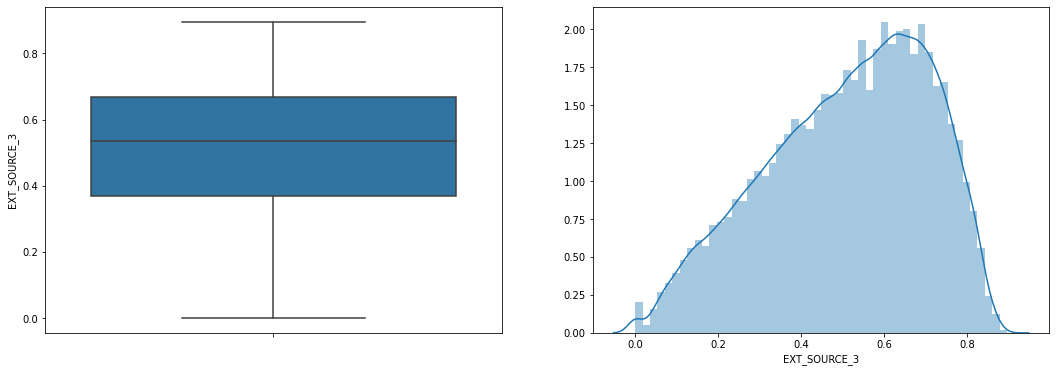

In [44]:
plt.figure(figsize=(18,6))
plt.subplot(1,2, 1)
sns.boxplot(y = app_data['EXT_SOURCE_3'].dropna())
plt.subplot(1, 2, 2)
sns.distplot(app_data['EXT_SOURCE_3'].dropna())

#### Inference - 'EXT_SOURCE_3' column null can be replaced with mean 

In [45]:
# Checking Number of enquiries to Credit Bureau about the client 
app_missing[['AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_WEEK', 
            'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR']].head()

,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0


#### Inference- These columns are imbalanced and there are lots of missing values so columns can be dropped, or  can be analysed separately

In [46]:
# Checking 'NAME_TYPE_SUITE'
app_missing['NAME_TYPE_SUITE'].value_counts()


Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

#### Inference # 'NAME_TYPE_SUITE' null values can be replaced with 'Unaccompanied' or The rows null can be dropped. We will retain this column

In [47]:
# Checking observation of client's social surroundings with observable DPD Days past due
app_missing[['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
                         'DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE']]

,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE
0,2.0,2.0,2.0,2.0
1,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,2.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
307506,0.0,0.0,0.0,0.0
307507,0.0,0.0,0.0,0.0
307508,6.0,6.0,0.0,0.0
307509,0.0,0.0,0.0,0.0


#### Inference - These columns are related to Target variable so should be retained, Outlier to be removed

### Outlier Analysis

In [48]:
app_missing[app_missing['OBS_60_CNT_SOCIAL_CIRCLE']  == 344]

,SK_ID_CURR,OCCUPATION_TYPE,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,NAME_TYPE_SUITE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE
148403,272071,Core staff,0.357293,0.0,3.0,1.0,1.0,0.0,0.0,Family,348.0,344.0,24.0,34.0,0.304506,180000.0,9000.0,1.0,-667.0


In [49]:
#Checking all 'Core Staff' Rows
app_missing[app_missing['OCCUPATION_TYPE']  == 'Core staff' ]

,SK_ID_CURR,OCCUPATION_TYPE,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,NAME_TYPE_SUITE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE
1,100003,Core staff,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Family,1.0,1.0,0.0,0.0,0.622246,1129500.0,35698.5,2.0,-828.0
4,100007,Core staff,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0
10,100014,Core staff,0.363945,0.0,0.0,0.0,1.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,0.651862,652500.0,21177.0,3.0,-844.0
19,100023,Core staff,0.477649,0.0,2.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,0.586617,454500.0,17563.5,2.0,-1850.0
34,100040,Core staff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unaccompanied,0.0,0.0,0.0,0.0,0.172498,1125000.0,32895.0,2.0,-3019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307465,456205,Core staff,0.766234,0.0,1.0,0.0,0.0,0.0,0.0,Unaccompanied,4.0,4.0,0.0,0.0,0.590768,675000.0,33259.5,3.0,-1135.0
307478,456218,Core staff,0.420611,0.0,2.0,1.0,0.0,0.0,0.0,Family,0.0,0.0,0.0,0.0,0.440537,1125000.0,40540.5,2.0,-549.0
307480,456220,Core staff,0.647977,0.0,4.0,0.0,0.0,0.0,0.0,Unaccompanied,1.0,1.0,0.0,1.0,0.679122,1350000.0,39474.0,3.0,-1594.0
307488,456232,Core staff,0.529890,2.0,1.0,0.0,0.0,0.0,0.0,Unaccompanied,1.0,1.0,0.0,0.0,0.619662,135000.0,13351.5,1.0,-610.0


#### Inference  app_missing[app_missing['OBS_60_CNT_SOCIAL_CIRCLE'] ==344] This Row (148403 index) looks like an Outlier It should be deleted 

#### Retaining all columns ['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE'] replacing null values with 0 can be done or The rows having null values can be dropped completely.

In [50]:
#Checking 'EXT_SOURCE_2'
app_missing['EXT_SOURCE_2'].value_counts()

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.169134      1
0.213753      1
0.057994      1
0.229146      1
0.336367      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

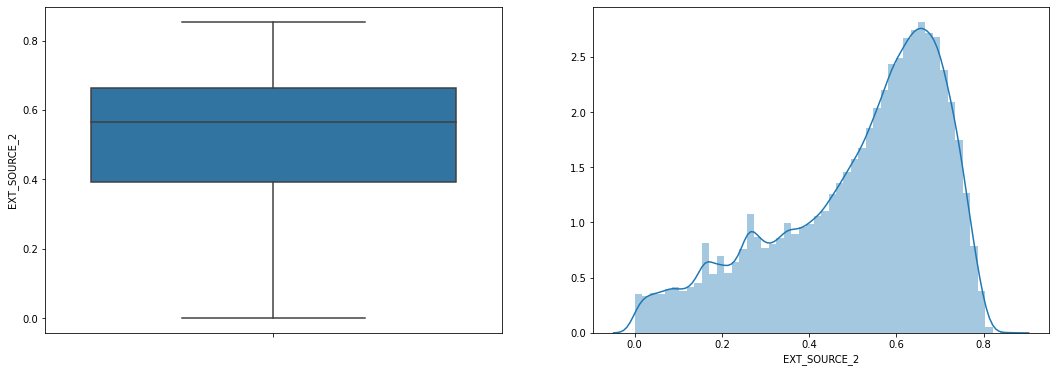

In [51]:
plt.figure(figsize=(18,6))
plt.subplot(1,2, 1)
sns.boxplot(y = app_data['EXT_SOURCE_2'].dropna())
plt.subplot(1, 2, 2)
sns.distplot(app_data['EXT_SOURCE_2'].dropna())

#### Inference - 'EXT_SOURCE_2' Null rows can be replaced with mean

In [52]:
# Checking Amount Columns
app_missing[['AMT_GOODS_PRICE', 'AMT_ANNUITY']].describe().T
                         

,count,mean,std,min,25%,50%,75%,max
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,40500.0,238500.0,450000.0,679500.0,4050000.0
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1615.5,16524.0,24903.0,34596.0,258025.5


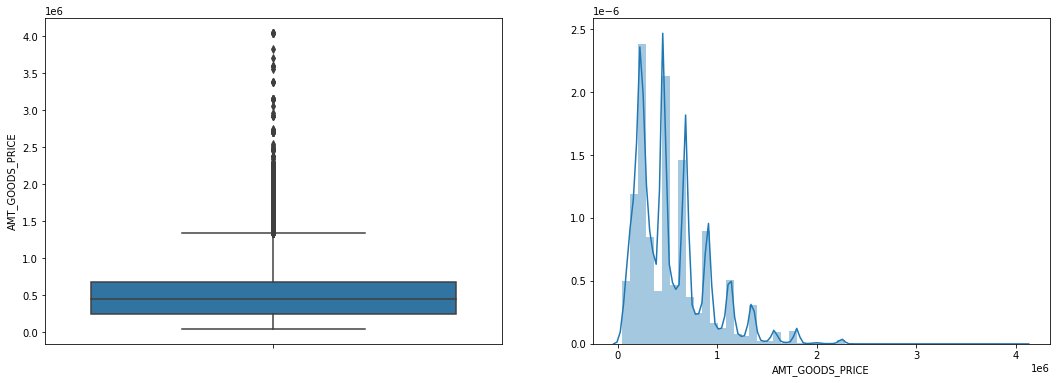

In [53]:
plt.figure(figsize=(18,6))
plt.subplot(1,2, 1)
sns.boxplot(y = app_data['AMT_GOODS_PRICE'].dropna())
plt.subplot(1, 2, 2)
sns.distplot(app_data['AMT_GOODS_PRICE'].dropna())

#### Outliers have to be handled - They are handled after merging of two datasets, there are fewer loan applications for amount greater than 1500000

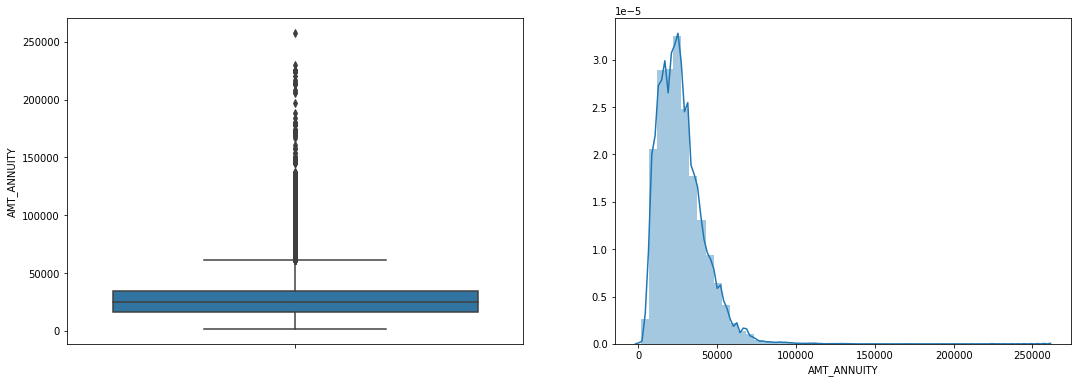

In [54]:
plt.figure(figsize=(18,6))
plt.subplot(1,2, 1)
sns.boxplot(y = app_data['AMT_ANNUITY'].dropna())
plt.subplot(1, 2, 2)
sns.distplot(app_data['AMT_ANNUITY'].dropna())

#### Inference Retaining ['AMT_GOODS_PRICE', 'AMT_ANNUITY']  we can even delete those null rows 

In [55]:
# Checking 'CNT_FAM_MEMBERS'
app_missing['CNT_FAM_MEMBERS'].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

#### Inference Retaining 'CNT_FAM_MEMBERS' , we can  drop rows with null values

In [56]:
#Checking 'DAYS_LAST_PHONE_CHANGE'
app_missing['DAYS_LAST_PHONE_CHANGE'].value_counts().sort_values()

-3731.0        1
-3583.0        1
-3900.0        1
-3581.0        1
-3771.0        1
           ...  
-4.0        1285
-3.0        1763
-2.0        2318
-1.0        2812
 0.0       37672
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64

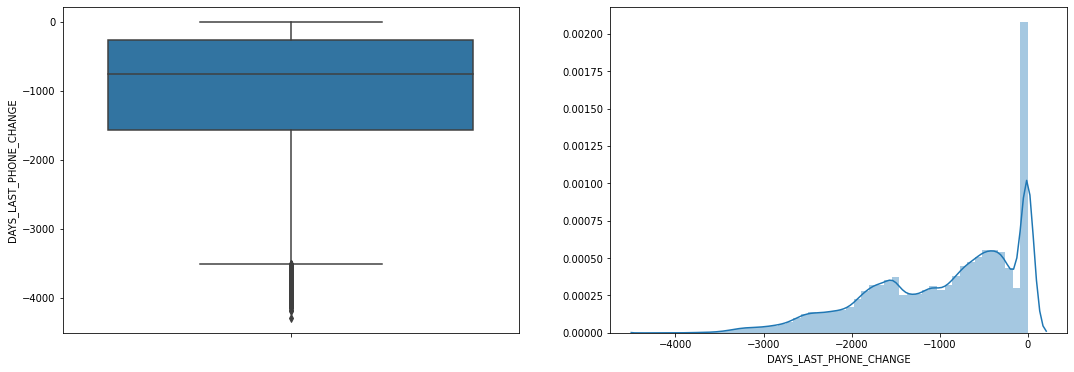

In [57]:
plt.figure(figsize=(18,6))
plt.subplot(1,2, 1)
sns.boxplot(y = app_data['DAYS_LAST_PHONE_CHANGE'].dropna())
plt.subplot(1, 2, 2)
sns.distplot(app_data['DAYS_LAST_PHONE_CHANGE'].dropna())

#### Inference - 'DAYS_LAST_PHONE_CHANGE Null Values can be Dropped, Outlier have to be handled, there are 37000 applicants that have changed mobile last day that seems to be an outlier or an incorrect value.

### In app_missing DataFrame the columns that we are using are


In [58]:
# Columns selected
app_data1 = app_data[['SK_ID_CURR','OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
                         'DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',  'AMT_GOODS_PRICE', 
                         'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE',  'EXT_SOURCE_2']]
app_data1.head()

,SK_ID_CURR,OCCUPATION_TYPE,NAME_TYPE_SUITE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_2
0,100002,Laborers,Unaccompanied,2.0,2.0,2.0,2.0,351000.0,24700.5,1.0,-1134.0,0.262949
1,100003,Core staff,Family,1.0,1.0,0.0,0.0,1129500.0,35698.5,2.0,-828.0,0.622246
2,100004,Laborers,Unaccompanied,0.0,0.0,0.0,0.0,135000.0,6750.0,1.0,-815.0,0.555912
3,100006,Laborers,Unaccompanied,2.0,2.0,0.0,0.0,297000.0,29686.5,2.0,-617.0,0.650442
4,100007,Core staff,Unaccompanied,0.0,0.0,0.0,0.0,513000.0,21865.5,1.0,-1106.0,0.322738


In [59]:
app_data1.shape

(307511, 12)

### Analysing Non Null Columns

In [60]:
# Creating separate DataFrame for 0 % null columns
app_real = app_data[['SK_ID_CURR','NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'FLAG_OWN_CAR', 'FLAG_EMAIL', 'TARGET', 'FLAG_PHONE', 
                    'FLAG_CONT_MOBILE', 'FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'FLAG_MOBIL', 
                     'CODE_GENDER', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'DAYS_ID_PUBLISH', 
                    'DAYS_REGISTRATION', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT', 
                    'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'CNT_CHILDREN', 'NAME_HOUSING_TYPE', 
                    'REG_REGION_NOT_LIVE_REGION', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_DOCUMENT_2', 
                    'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 
                    'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 
                    'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 
                    'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'ORGANIZATION_TYPE', 
                    'LIVE_CITY_NOT_WORK_CITY',       'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY', 
                    'LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_REGION', 'HOUR_APPR_PROCESS_START']]
app_real.shape

(307511, 55)

In [61]:
# Viewing head of DataFrame

app_real.head(4)

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_CREDIT,FLAG_OWN_CAR,FLAG_EMAIL,TARGET,FLAG_PHONE,FLAG_CONT_MOBILE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,CODE_GENDER,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,CNT_CHILDREN,NAME_HOUSING_TYPE,REG_REGION_NOT_LIVE_REGION,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,ORGANIZATION_TYPE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,HOUR_APPR_PROCESS_START
0,100002,Cash loans,406597.5,N,0,1,1,1,0,1,1,M,Y,202500.0,-2120,-3648.0,-637,-9461,0.018801,2,Single / not married,Secondary / secondary special,Working,0,House / apartment,0,2,WEDNESDAY,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Business Entity Type 3,0,0,0,0,0,10
1,100003,Cash loans,1293502.5,N,0,0,1,1,0,1,1,F,N,270000.0,-291,-1186.0,-1188,-16765,0.003541,1,Married,Higher education,State servant,0,House / apartment,0,1,MONDAY,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,School,0,0,0,0,0,11
2,100004,Revolving loans,135000.0,Y,0,0,1,1,1,1,1,M,Y,67500.0,-2531,-4260.0,-225,-19046,0.010032,2,Single / not married,Secondary / secondary special,Working,0,House / apartment,0,2,MONDAY,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Government,0,0,0,0,0,9
3,100006,Cash loans,312682.5,N,0,0,0,1,0,1,1,F,Y,135000.0,-2437,-9833.0,-3039,-19005,0.008019,2,Civil marriage,Secondary / secondary special,Working,0,House / apartment,0,2,WEDNESDAY,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Business Entity Type 3,0,0,0,0,0,17


### Selecting Columns which are useful for analysis after looking at value_counts

In [62]:
#Did client provide email
app_real['FLAG_EMAIL'].value_counts()
# Not selected

0    290069
1     17442
Name: FLAG_EMAIL, dtype: int64

In [63]:
17442/307511*100


5.6719922214164695

#### Inference Here Information for '1'  is less than 6% Data is Imbalanced

In [64]:
#Did client provide home phone
app_real['FLAG_PHONE'].value_counts()

0    221080
1     86431
Name: FLAG_PHONE, dtype: int64

In [65]:
86431/307511*100

28.106636835755467

#### Inference Here Information for '1'  is 28%

In [66]:
# Gender of the client
app_real['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [67]:
# Checking 'XNA' Values
app_real[app_real['CODE_GENDER'] == 'XNA']

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_CREDIT,FLAG_OWN_CAR,FLAG_EMAIL,TARGET,FLAG_PHONE,FLAG_CONT_MOBILE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,CODE_GENDER,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,CNT_CHILDREN,NAME_HOUSING_TYPE,REG_REGION_NOT_LIVE_REGION,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,ORGANIZATION_TYPE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,HOUR_APPR_PROCESS_START
35657,141289,Revolving loans,382500.0,Y,0,0,1,1,1,1,1,XNA,Y,207000.0,-3537,-10024.0,-10044,-20232,0.020713,3,Married,Secondary / secondary special,Working,0,Municipal apartment,0,3,TUESDAY,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Business Entity Type 1,0,0,0,0,0,10
38566,144669,Revolving loans,270000.0,N,0,0,1,1,1,1,1,XNA,Y,157500.0,-4659,-2241.0,-2797,-13717,0.026392,2,Married,Secondary / secondary special,Working,2,House / apartment,0,2,FRIDAY,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Industry: type 3,0,0,0,0,0,16
83382,196708,Revolving loans,405000.0,N,0,0,1,1,1,1,1,XNA,Y,135000.0,-1671,-183.0,-1228,-10647,0.035792,2,Married,Higher education,Working,1,House / apartment,0,2,THURSDAY,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Kindergarten,0,0,0,0,0,15
189640,319880,Revolving loans,540000.0,Y,0,0,1,1,1,1,1,XNA,Y,247500.0,-2326,-4099.0,-2293,-9649,0.035792,2,Civil marriage,Incomplete higher,Commercial associate,0,House / apartment,0,2,FRIDAY,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Medicine,0,0,0,0,0,15


#### Inference - All above  4 rows can be deleted as Target variable is 0 so no comparison can be made

In [68]:
#How many days before the application did client change the identity document with which he applied for the loan
#How many days before the application did client change his registration
#How many days before the application the person started current employment
#Client's age in days at the time of application

app_real[['TARGET','DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_EMPLOYED', 'DAYS_BIRTH' ]].head()

,TARGET,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH
0,1,-2120,-3648.0,-637,-9461
1,0,-291,-1186.0,-1188,-16765
2,0,-2531,-4260.0,-225,-19046
3,0,-2437,-9833.0,-3039,-19005
4,0,-3458,-4311.0,-3038,-19932


#### Inference - Days to be converted to years or datetime for analysis

In [69]:
# Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)
app_real['REG_REGION_NOT_LIVE_REGION'].value_counts()


0    302854
1      4657
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64

In [70]:
4657/307511*100

1.514417370435529

#### Inference - Information 1 is less than 2% so this column can be deleted

### Selecting Final Columns

In [71]:
# Selecting non null columns

app_data2 = app_data[['SK_ID_CURR','NAME_CONTRACT_TYPE', 'CODE_GENDER', 'ORGANIZATION_TYPE',
 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'NAME_HOUSING_TYPE','CNT_CHILDREN',
 'AMT_INCOME_TOTAL','AMT_CREDIT', 
 'FLAG_OWN_CAR', 'FLAG_PHONE',  'FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'FLAG_OWN_REALTY',
  'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 
 'REGION_POPULATION_RELATIVE',  'REGION_RATING_CLIENT', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
 'REGION_RATING_CLIENT_W_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY', 
 'LIVE_REGION_NOT_WORK_REGION', 
 'WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START', 
 'TARGET']]
app_data2.shape

(307511, 32)

In [72]:
# Columns with some null values
app_data1.columns

Index(['SK_ID_CURR', 'OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE', 'EXT_SOURCE_2'], dtype='object')

In [73]:
# Non null columns
app_data2.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'ORGANIZATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'NAME_HOUSING_TYPE', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'FLAG_OWN_CAR', 'FLAG_PHONE', 'FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'FLAG_OWN_REALTY', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'REGION_RATING_CLIENT_W_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'TARGET'], dtype='object')

### Final Selection of Columns and Rearranging

In [74]:
# Final Selection of Columns and Rearranging

application_data = app_data[
['SK_ID_CURR',  'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'ORGANIZATION_TYPE', 'OCCUPATION_TYPE','CNT_FAM_MEMBERS','CNT_CHILDREN',
 'NAME_TYPE_SUITE', 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'NAME_HOUSING_TYPE',  
 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'FLAG_OWN_CAR', 'FLAG_PHONE', 'FLAG_WORK_PHONE', 
 'FLAG_EMP_PHONE', 'FLAG_OWN_REALTY',  'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 
 'DAYS_LAST_PHONE_CHANGE','EXT_SOURCE_2', 'REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT', 
 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',  'REGION_RATING_CLIENT_W_CITY', 'LIVE_CITY_NOT_WORK_CITY',
 'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY', 'LIVE_REGION_NOT_WORK_REGION',  'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',  'DEF_60_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE', 'TARGET']]
application_data.shape

(307511, 43)

In [75]:
#Checking Head
application_data.head(4)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,ORGANIZATION_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,AMT_ANNUITY,FLAG_OWN_CAR,FLAG_PHONE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_OWN_REALTY,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_2,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REGION_RATING_CLIENT_W_CITY,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,TARGET
0,100002,Cash loans,M,Business Entity Type 3,Laborers,1.0,0,Unaccompanied,Single / not married,Secondary / secondary special,Working,House / apartment,202500.0,406597.5,351000.0,24700.5,N,1,0,1,Y,-2120,-3648.0,-637,-9461,-1134.0,0.262949,0.018801,2,0,0,2,0,0,0,0,WEDNESDAY,10,2.0,2.0,2.0,2.0,1
1,100003,Cash loans,F,School,Core staff,2.0,0,Family,Married,Higher education,State servant,House / apartment,270000.0,1293502.5,1129500.0,35698.5,N,1,0,1,N,-291,-1186.0,-1188,-16765,-828.0,0.622246,0.003541,1,0,0,1,0,0,0,0,MONDAY,11,1.0,1.0,0.0,0.0,0
2,100004,Revolving loans,M,Government,Laborers,1.0,0,Unaccompanied,Single / not married,Secondary / secondary special,Working,House / apartment,67500.0,135000.0,135000.0,6750.0,Y,1,1,1,Y,-2531,-4260.0,-225,-19046,-815.0,0.555912,0.010032,2,0,0,2,0,0,0,0,MONDAY,9,0.0,0.0,0.0,0.0,0
3,100006,Cash loans,F,Business Entity Type 3,Laborers,2.0,0,Unaccompanied,Civil marriage,Secondary / secondary special,Working,House / apartment,135000.0,312682.5,297000.0,29686.5,N,0,0,1,Y,-2437,-9833.0,-3039,-19005,-617.0,0.650442,0.008019,2,0,0,2,0,0,0,0,WEDNESDAY,17,2.0,2.0,0.0,0.0,0


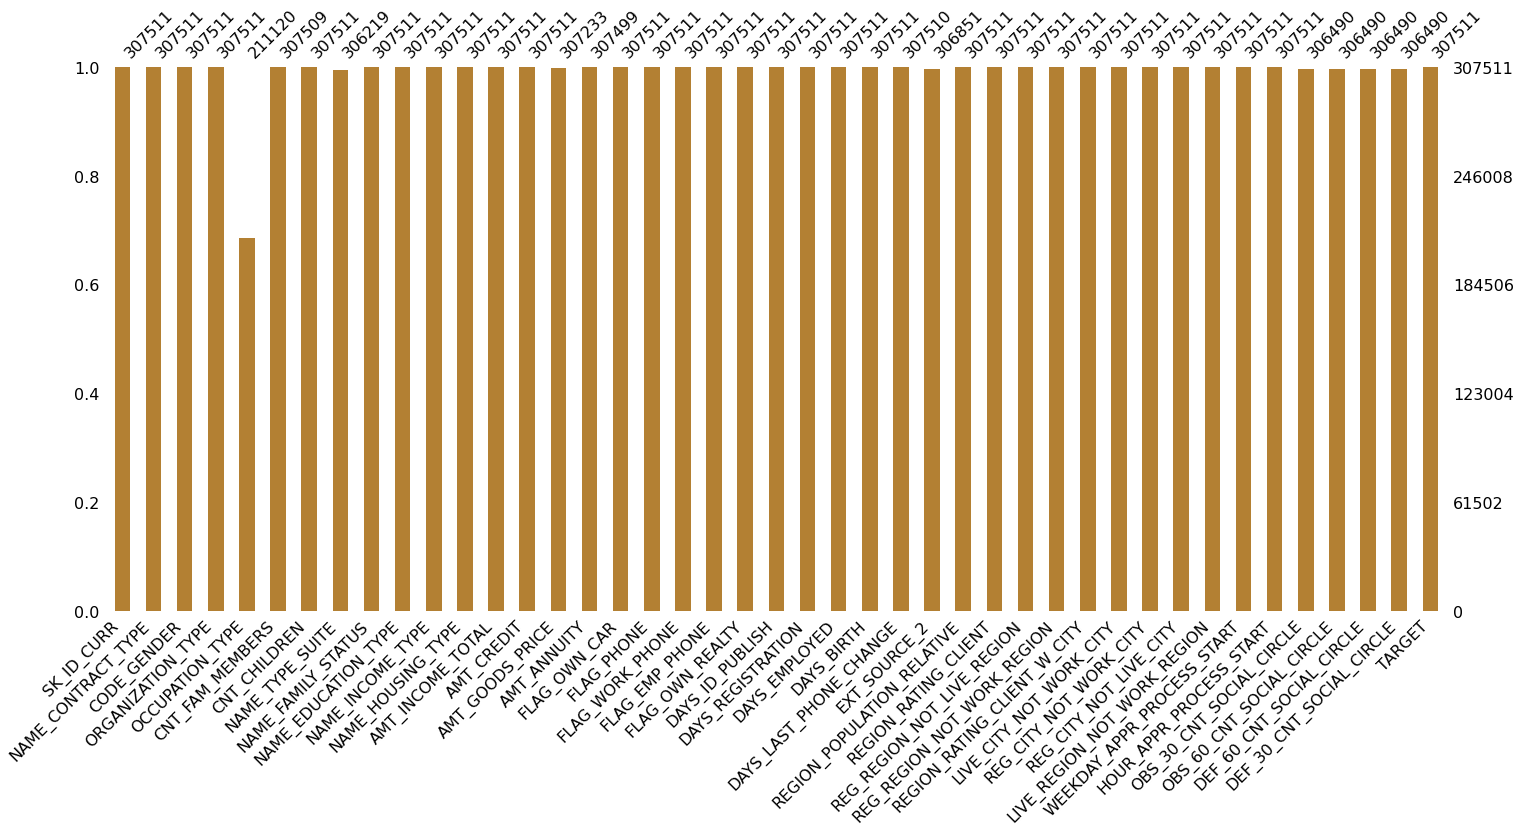

In [76]:
missingno.bar(application_data, color = (.7, .5, .2))

### This is the dataframe we will be working on, it has got 43 columns

In [77]:
#Finding % Null columnwise
application_data.isnull().mean()*100

SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
ORGANIZATION_TYPE               0.000000
OCCUPATION_TYPE                31.345545
CNT_FAM_MEMBERS                 0.000650
CNT_CHILDREN                    0.000000
NAME_TYPE_SUITE                 0.420148
NAME_FAMILY_STATUS              0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_INCOME_TYPE                0.000000
NAME_HOUSING_TYPE               0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
FLAG_OWN_CAR                    0.000000
FLAG_PHONE                      0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_OWN_REALTY                 0.000000
DAYS_ID_PUBLISH                 0.000000
DAYS_REGISTRATION               0.000000
DAYS_EMPLOYED                   0.000000
DAYS_BIRTH      

### Making a copy of dataframe

In [78]:
app_data_final = application_data.copy()
app_data_final.shape

(307511, 43)

#### Replacing Null in Occupation Column

In [79]:
app_data_final['OCCUPATION_TYPE'].fillna('Unknown', inplace = True)

In [80]:
app_data_final['OCCUPATION_TYPE'].isnull().sum()

0

#### Dropping 'XNA' Gender

In [81]:
app_data_final.loc[[35657,38566, 83382,189640 ],:]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,ORGANIZATION_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,AMT_ANNUITY,FLAG_OWN_CAR,FLAG_PHONE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_OWN_REALTY,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_2,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REGION_RATING_CLIENT_W_CITY,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,TARGET
35657,141289,Revolving loans,XNA,Business Entity Type 1,Unknown,2.0,0,Unaccompanied,Married,Secondary / secondary special,Working,Municipal apartment,207000.0,382500.0,337500.0,19125.0,Y,1,1,1,Y,-3537,-10024.0,-10044,-20232,-286.0,0.295998,0.020713,3,0,0,3,0,0,0,0,TUESDAY,10,0.0,0.0,0.0,0.0,0
38566,144669,Revolving loans,XNA,Industry: type 3,Low-skill Laborers,4.0,2,Family,Married,Secondary / secondary special,Working,House / apartment,157500.0,270000.0,225000.0,13500.0,N,1,1,1,Y,-4659,-2241.0,-2797,-13717,-493.0,0.709205,0.026392,2,0,0,2,0,0,0,0,FRIDAY,16,0.0,0.0,0.0,0.0,0
83382,196708,Revolving loans,XNA,Kindergarten,Core staff,3.0,1,Unaccompanied,Married,Higher education,Working,House / apartment,135000.0,405000.0,225000.0,20250.0,N,1,1,1,Y,-1671,-183.0,-1228,-10647,-851.0,0.659185,0.035792,2,0,0,2,0,0,0,0,THURSDAY,15,7.0,7.0,1.0,1.0,0
189640,319880,Revolving loans,XNA,Medicine,Unknown,2.0,0,Unaccompanied,Civil marriage,Incomplete higher,Commercial associate,House / apartment,247500.0,540000.0,900000.0,27000.0,Y,1,1,1,Y,-2326,-4099.0,-2293,-9649,-1681.0,0.658620,0.035792,2,0,0,2,0,0,0,0,FRIDAY,15,10.0,10.0,4.0,4.0,0


In [82]:
app_data_final.drop([35657,38566, 83382,189640 ] ,axis = 0, inplace = True)

In [83]:
app_data_final.shape

(307507, 43)

#### Dropping Outlier Column

In [84]:
app_data_final.drop([148403], inplace = True, axis = 0)

In [85]:
app_data_final.dropna(axis = 0, inplace = True)

In [86]:
app_data_final.shape

(304526, 43)

In [87]:
#Checking % Null Column wise
app_data_final.isnull().mean()*100

SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
ORGANIZATION_TYPE              0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS                0.0
CNT_CHILDREN                   0.0
NAME_TYPE_SUITE                0.0
NAME_FAMILY_STATUS             0.0
NAME_EDUCATION_TYPE            0.0
NAME_INCOME_TYPE               0.0
NAME_HOUSING_TYPE              0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_GOODS_PRICE                0.0
AMT_ANNUITY                    0.0
FLAG_OWN_CAR                   0.0
FLAG_PHONE                     0.0
FLAG_WORK_PHONE                0.0
FLAG_EMP_PHONE                 0.0
FLAG_OWN_REALTY                0.0
DAYS_ID_PUBLISH                0.0
DAYS_REGISTRATION              0.0
DAYS_EMPLOYED                  0.0
DAYS_BIRTH                     0.0
DAYS_LAST_PHONE_CHANGE         0.0
EXT_SOURCE_2                   0.0
REGION_POPULATION_RELATIVE     0.0
REGION_RATING_CLIENT

#### Changing Data Type

In [88]:
# Changing data type of few columns
app_data_final = app_data_final.astype({'CNT_FAM_MEMBERS': 'int64','DAYS_REGISTRATION': 'int64'})

In [89]:
# Checking Change in DataType
app_data_final.dtypes

SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
ORGANIZATION_TYPE               object
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                  int64
CNT_CHILDREN                     int64
NAME_TYPE_SUITE                 object
NAME_FAMILY_STATUS              object
NAME_EDUCATION_TYPE             object
NAME_INCOME_TYPE                object
NAME_HOUSING_TYPE               object
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
AMT_ANNUITY                    float64
FLAG_OWN_CAR                    object
FLAG_PHONE                       int64
FLAG_WORK_PHONE                  int64
FLAG_EMP_PHONE                   int64
FLAG_OWN_REALTY                 object
DAYS_ID_PUBLISH                  int64
DAYS_REGISTRATION                int64
DAYS_EMPLOYED                    int64
DAYS_BIRTH                       int64
DAYS_LAST_PHONE_CHANGE   

### Splitting DataSet by TARGET

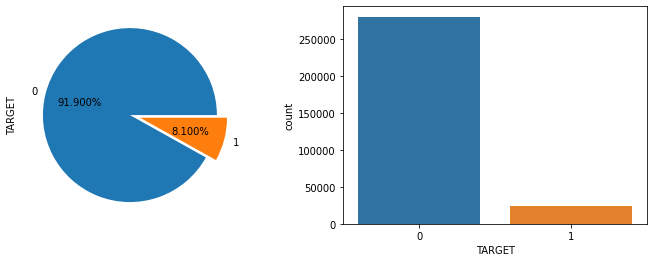

In [90]:
f, ax = plt.subplots(1, 2, figsize = (12,4))
app_data_final.TARGET.value_counts().plot.pie(explode = [0,0.12], autopct = '%1.3f%%', ax = ax[0])
sns.countplot('TARGET',data = app_data_final )
plt.show()

#### We can see there is imbalance between Defaulters and Non Defaulters. One way to handle imbalanced data is by undersampling large dataset and oversampling less classified dataset. So that, the final dataset will have a balanced/equal number of data among all the features.

## Splitting The dataset by Target 

In [91]:
app_data_final.shape

(304526, 43)

#### Creating Dataframe for Target = 1

In [92]:
#Splitting Dataset by TARGET == 1

app_data_target1 = app_data_final[app_data_final['TARGET'] == 1]
app_data_target1.shape


(24667, 43)

In [93]:
app_data_target1.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,ORGANIZATION_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,AMT_ANNUITY,FLAG_OWN_CAR,FLAG_PHONE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_OWN_REALTY,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_2,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REGION_RATING_CLIENT_W_CITY,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,TARGET
0,100002,Cash loans,M,Business Entity Type 3,Laborers,1,0,Unaccompanied,Single / not married,Secondary / secondary special,Working,House / apartment,202500.0,406597.5,351000.0,24700.5,N,1,0,1,Y,-2120,-3648,-637,-9461,-1134.0,0.262949,0.018801,2,0,0,2,0,0,0,0,WEDNESDAY,10,2.0,2.0,2.0,2.0,1
26,100031,Cash loans,F,Business Entity Type 3,Cooking staff,1,0,Unaccompanied,Widow,Secondary / secondary special,Working,House / apartment,112500.0,979992.0,702000.0,27076.5,N,0,0,1,Y,-1827,-6573,-2628,-18724,-161.0,0.548477,0.018029,3,0,0,2,0,0,0,0,MONDAY,9,10.0,10.0,0.0,1.0,1
40,100047,Cash loans,M,Business Entity Type 3,Laborers,2,0,Unaccompanied,Married,Secondary / secondary special,Commercial associate,House / apartment,202500.0,1193580.0,855000.0,35028.0,N,0,0,1,Y,-1029,-1182,-1262,-17482,-1075.0,0.306841,0.025164,2,0,0,2,0,0,0,0,TUESDAY,9,0.0,0.0,0.0,0.0,1
42,100049,Cash loans,F,Self-employed,Sales staff,2,0,Unaccompanied,Civil marriage,Secondary / secondary special,Working,House / apartment,135000.0,288873.0,238500.0,16258.5,N,1,1,1,N,-4409,-45,-3597,-13384,-1480.0,0.674203,0.007305,3,0,0,3,0,0,0,0,THURSDAY,11,1.0,1.0,0.0,0.0,1
81,100096,Cash loans,F,XNA,Unknown,2,0,Unaccompanied,Married,Secondary / secondary special,Pensioner,House / apartment,81000.0,252000.0,252000.0,14593.5,N,0,0,0,Y,-4199,-5391,365243,-24794,0.0,0.023952,0.028663,2,0,0,2,0,0,0,0,THURSDAY,10,1.0,1.0,1.0,1.0,1


In [94]:
# % when Target == 1

(app_data_target1.shape[0]/app_data_final.shape[0])*100

8.100129381399288

#### Creating Dataframe for Target = 0

In [95]:
#Splitting Dataset by TARGET == 0
app_data_target0 = app_data_final[app_data_final['TARGET'] == 0]
app_data_target0.shape


(279859, 43)

In [96]:
app_data_target0.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,ORGANIZATION_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,AMT_ANNUITY,FLAG_OWN_CAR,FLAG_PHONE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_OWN_REALTY,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_2,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REGION_RATING_CLIENT_W_CITY,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,TARGET
1,100003,Cash loans,F,School,Core staff,2,0,Family,Married,Higher education,State servant,House / apartment,270000.0,1293502.5,1129500.0,35698.5,N,1,0,1,N,-291,-1186,-1188,-16765,-828.0,0.622246,0.003541,1,0,0,1,0,0,0,0,MONDAY,11,1.0,1.0,0.0,0.0,0
2,100004,Revolving loans,M,Government,Laborers,1,0,Unaccompanied,Single / not married,Secondary / secondary special,Working,House / apartment,67500.0,135000.0,135000.0,6750.0,Y,1,1,1,Y,-2531,-4260,-225,-19046,-815.0,0.555912,0.010032,2,0,0,2,0,0,0,0,MONDAY,9,0.0,0.0,0.0,0.0,0
3,100006,Cash loans,F,Business Entity Type 3,Laborers,2,0,Unaccompanied,Civil marriage,Secondary / secondary special,Working,House / apartment,135000.0,312682.5,297000.0,29686.5,N,0,0,1,Y,-2437,-9833,-3039,-19005,-617.0,0.650442,0.008019,2,0,0,2,0,0,0,0,WEDNESDAY,17,2.0,2.0,0.0,0.0,0
4,100007,Cash loans,M,Religion,Core staff,1,0,Unaccompanied,Single / not married,Secondary / secondary special,Working,House / apartment,121500.0,513000.0,513000.0,21865.5,N,0,0,1,Y,-3458,-4311,-3038,-19932,-1106.0,0.322738,0.028663,2,0,0,2,1,1,0,0,THURSDAY,11,0.0,0.0,0.0,0.0,0
5,100008,Cash loans,M,Other,Laborers,2,0,"Spouse, partner",Married,Secondary / secondary special,State servant,House / apartment,99000.0,490495.5,454500.0,27517.5,N,1,1,1,Y,-477,-4970,-1588,-16941,-2536.0,0.354225,0.035792,2,0,0,2,0,0,0,0,WEDNESDAY,16,0.0,0.0,0.0,0.0,0


In [97]:
# % when Target == 0
app_data_target0.shape[0]/app_data_final.shape[0]*100

91.89987061860072

In [98]:
app_data_target1.isnull().sum()

SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
ORGANIZATION_TYPE              0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
CNT_CHILDREN                   0
NAME_TYPE_SUITE                0
NAME_FAMILY_STATUS             0
NAME_EDUCATION_TYPE            0
NAME_INCOME_TYPE               0
NAME_HOUSING_TYPE              0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
AMT_ANNUITY                    0
FLAG_OWN_CAR                   0
FLAG_PHONE                     0
FLAG_WORK_PHONE                0
FLAG_EMP_PHONE                 0
FLAG_OWN_REALTY                0
DAYS_ID_PUBLISH                0
DAYS_REGISTRATION              0
DAYS_EMPLOYED                  0
DAYS_BIRTH                     0
DAYS_LAST_PHONE_CHANGE         0
EXT_SOURCE_2                   0
REGION_POPULATION_RELATIVE     0
REGION_RATING_CLIENT           0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION

### Checking correlation

In [99]:
app_data_target1.corr()

,SK_ID_CURR,CNT_FAM_MEMBERS,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,AMT_ANNUITY,FLAG_PHONE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_2,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REGION_RATING_CLIENT_W_CITY,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,HOUR_APPR_PROCESS_START,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,TARGET
SK_ID_CURR,1.000000,-0.003892,-0.004929,-0.010158,-0.001341,-0.001934,-0.007411,0.018404,0.004988,0.005669,-0.002832,0.005975,-0.005563,-0.000933,0.003112,0.005760,0.005998,-0.005593,-0.003255,0.004199,-0.003829,-0.003497,0.000570,0.008822,0.004061,0.005521,-0.010106,-0.009783,-0.009628,-0.005787,NaN
CNT_FAM_MEMBERS,-0.003892,1.000000,0.885556,0.006670,0.051666,0.047699,0.075943,-0.002808,0.061997,0.186343,-0.032679,0.145213,-0.186342,0.203105,-0.012885,0.002303,-0.030059,0.044165,-0.025734,-0.026341,0.048323,0.060485,0.045577,-0.004975,-0.016904,-0.027401,0.044325,0.043639,-0.000262,0.007904,NaN
CNT_CHILDREN,-0.004929,0.885556,1.000000,0.004792,-0.001534,-0.008114,0.031118,-0.024262,0.051303,0.192648,-0.033480,0.148700,-0.192111,0.258889,0.012128,-0.011959,-0.031885,0.041342,-0.024085,-0.020449,0.043820,0.052923,0.045904,-0.000488,-0.011732,-0.023612,0.025948,0.025323,-0.004660,0.001920,NaN
AMT_INCOME_TOTAL,-0.010158,0.006670,0.004792,1.000000,0.037845,0.037339,0.046189,-0.004506,-0.012120,0.014895,-0.004195,0.000054,-0.014902,0.003076,-0.002338,0.007201,0.009201,-0.021473,0.007547,0.014471,-0.022783,-0.001439,-0.003109,-0.002218,0.013378,0.013733,-0.004721,-0.004630,-0.004842,-0.005200,NaN
AMT_CREDIT,-0.001341,0.051666,-0.001534,0.037845,1.000000,0.983065,0.751400,0.008073,-0.059499,-0.001868,-0.052195,-0.026396,0.000230,-0.136683,-0.111768,0.121507,0.068751,-0.058003,0.019624,0.032285,-0.070251,-0.017670,-0.038783,-0.032922,0.032555,0.030853,0.019937,0.020279,-0.030704,-0.025922,NaN
AMT_GOODS_PRICE,-0.001934,0.047699,-0.008114,0.037339,0.983065,1.000000,0.752206,0.026731,-0.034147,-0.006427,-0.056019,-0.026389,0.004735,-0.137117,-0.118894,0.131572,0.075933,-0.065178,0.022575,0.035632,-0.076048,-0.018090,-0.040112,-0.033814,0.034801,0.043435,0.020660,0.021126,-0.026169,-0.021869,NaN
AMT_ANNUITY,-0.007411,0.075943,0.031118,0.046189,0.751400,0.752206,1.000000,-0.014522,-0.049719,0.081184,-0.016408,0.033872,-0.081939,-0.014724,-0.080135,0.117495,0.071496,-0.073362,0.034765,0.066079,-0.088908,0.009285,0.001407,-0.005805,0.063767,0.030379,0.004946,0.005931,-0.027581,-0.022534,NaN
FLAG_PHONE,0.018404,-0.002808,-0.024262,-0.004506,0.008073,0.026731,-0.014522,1.000000,0.310413,-0.014927,-0.038478,-0.064045,0.013942,-0.025831,-0.072543,0.047041,0.071631,-0.060227,0.011048,0.013128,-0.057599,-0.011562,-0.039397,-0.044421,0.013612,0.062455,-0.033061,-0.032821,-0.026227,-0.028863,NaN
FLAG_WORK_PHONE,0.004988,0.061997,0.051303,-0.012120,-0.059499,-0.034147,-0.049719,0.310413,1.000000,0.206651,0.024582,0.049773,-0.206948,0.156172,-0.041070,-0.014816,-0.017771,0.011389,0.075171,0.080767,0.017764,0.093793,0.094561,0.026373,0.047038,0.044337,-0.023480,-0.023194,-0.008336,-0.013286,NaN
FLAG_EMP_PHONE,0.005669,0.186343,0.192648,0.014895,-0.001868,-0.006427,0.081184,-0.014927,0.206651,1.000000,0.228180,0.190661,-0.999700,0.579372,-0.000795,0.000173,-0.016133,-0.003466,0.034103,0.089997,-0.002771,0.197442,0.243690,0.086768,0.077904,0.059248,0.008113,0.008434,-0.005305,-0.003170,NaN


### Top 10 highly correlated variables are

* DAYS_EMPLOYED - FLAG_EMP_PHONE =     -1
* CNT_CHILDREN - CNT_FAM_MEMBERS =     0.89
* AMT_GOODS_PRICE - AMT_CREDIT =     0.98
* AMT_ANNUITY - AMT_CREDIT =    0.75
* AMT_ANNUITY - AMT_GOODS_PRICE =    0.75
* REGION_RATING_CLIENT_W_CITY - REGION_RATING_CLIENT =    0.96
* LIVE_REGION_NOT_WORK_REGION - REG_REGION_NOT_WORK_REGION =    0.85
* REG_CITY_NOT_WORK_CITY =     LIVE_CITY_NOT_WORK_CITY =    0.78
* DEF_30_CNT_SOCIAL_CIRCLE - DEF_60_CNT_SOCIAL_CIRCLE  =    0.87
* FLAG_EMP_PHONE - DAYS_BIRTH =    0.58
* DAYS_EMPLOYED - DAYS_BIRTH =     -0.58
* REGION_RATING_NOT_WORK_REGION - REGION_RATING_NOT_LIVE_REGION =     0.5

### Plots to get Insight of data

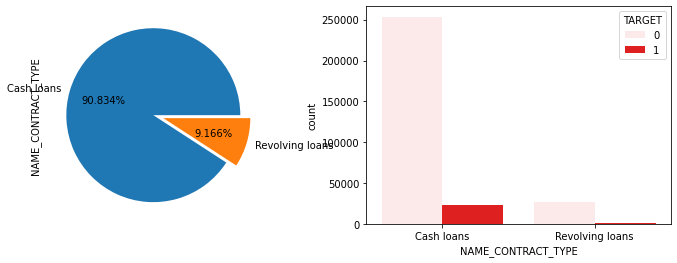

In [100]:
f,ax=plt.subplots(1,2, figsize=(12,4))
app_data_final.NAME_CONTRACT_TYPE.value_counts().plot.pie(explode=[0,0.12],autopct='%1.3f%%',ax=ax[0])
sns.countplot('NAME_CONTRACT_TYPE',data = app_data_final , hue = 'TARGET', color = 'red',ax=ax[1])
plt.show()

#### Inference - More cash loans are passed by the bank

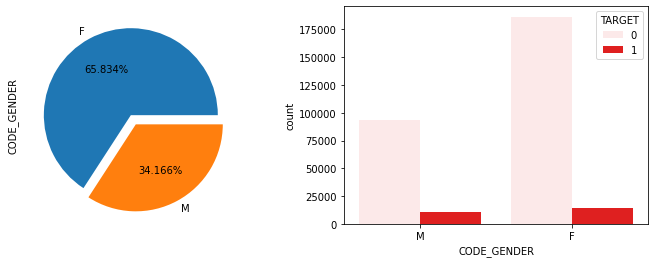

In [101]:
f,ax=plt.subplots(1,2, figsize=(12,4))
app_data_final['CODE_GENDER'].value_counts().plot.pie(explode=[0,0.12],autopct='%1.3f%%',ax=ax[0])
sns.countplot('CODE_GENDER',data = app_data_final , hue = 'TARGET', color = 'red')
plt.show()

#### Inference - Males are more likely to default as compared to females

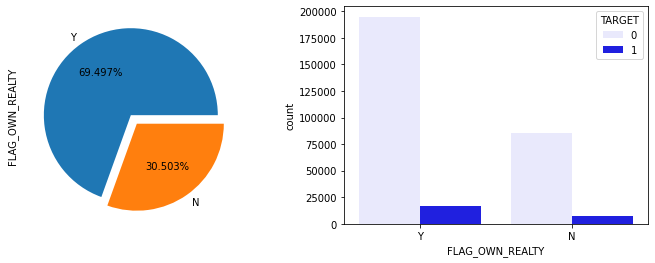

In [102]:
f,ax=plt.subplots(1,2, figsize=(12,4))
app_data_final['FLAG_OWN_REALTY'].value_counts().plot.pie(explode=[0,0.12],autopct='%1.3f%%',ax=ax[0])
sns.countplot('FLAG_OWN_REALTY',data = app_data_final , hue = 'TARGET', color = 'blue')
plt.show()

#### Inference - % default is more for people not having own house or flat

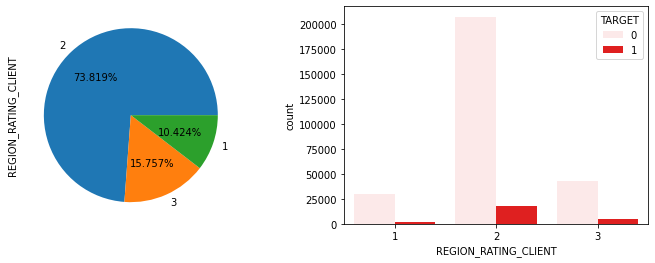

In [103]:
f,ax=plt.subplots(1,2, figsize=(12,4))
app_data_final['REGION_RATING_CLIENT'].value_counts().plot.pie(autopct='%1.3f%%',ax=ax[0])
sns.countplot('REGION_RATING_CLIENT',data = app_data_final , hue = 'TARGET', color = 'red', )
plt.show()

#### Inference - People of region 2 take loan more often

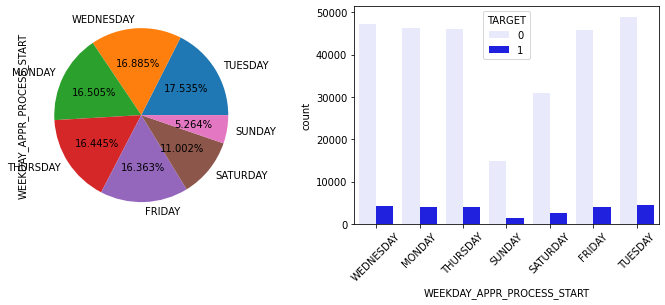

In [104]:
f,ax=plt.subplots(1,2, figsize=(12,4))
app_data_final['WEEKDAY_APPR_PROCESS_START'].value_counts().plot.pie(autopct='%1.3f%%',ax=ax[0])
sns.countplot('WEEKDAY_APPR_PROCESS_START',data = app_data_final , hue = 'TARGET', color = 'blue')
plt.xticks(rotation = 45)
plt.show()

#### Inference - People who take loan on Sunday have higher % of default cases

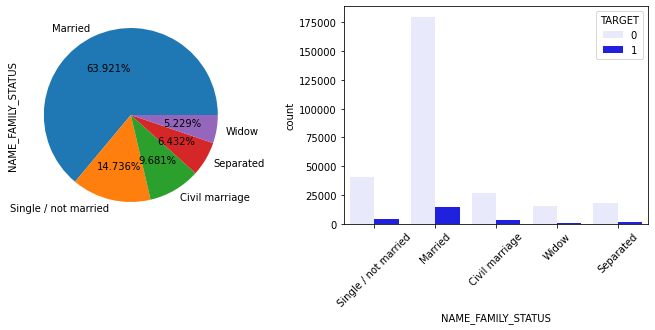

In [105]:
f,ax=plt.subplots(1,2, figsize=(12,4))
app_data_final['NAME_FAMILY_STATUS'].value_counts().plot.pie(autopct='%1.3f%%',ax=ax[0])
sns.countplot('NAME_FAMILY_STATUS',data = app_data_final , hue = 'TARGET', color = 'blue')
plt.xticks(rotation = 45)
plt.show()

#### Inference - Higher no of married people apply for loan

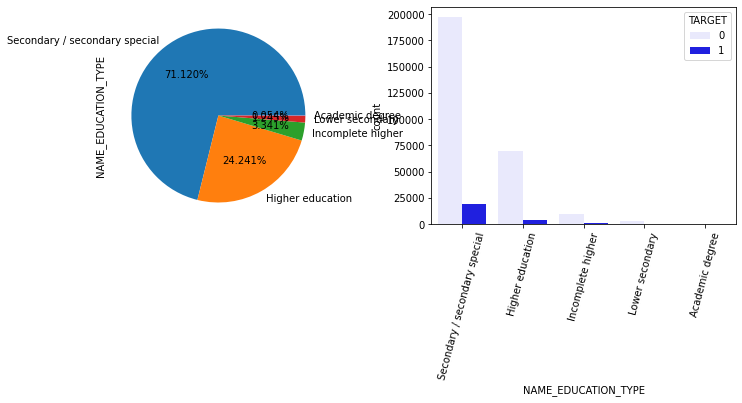

In [106]:
f,ax=plt.subplots(1,2, figsize=(12,4))
app_data_final['NAME_EDUCATION_TYPE'].value_counts().plot.pie(autopct='%1.3f%%',ax=ax[0])
sns.countplot('NAME_EDUCATION_TYPE',data = app_data_final , hue = 'TARGET', color = 'blue')
plt.xticks(rotation = 75)
plt.show()

#### Inference - Secondary/ secondary special people  take more loan

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

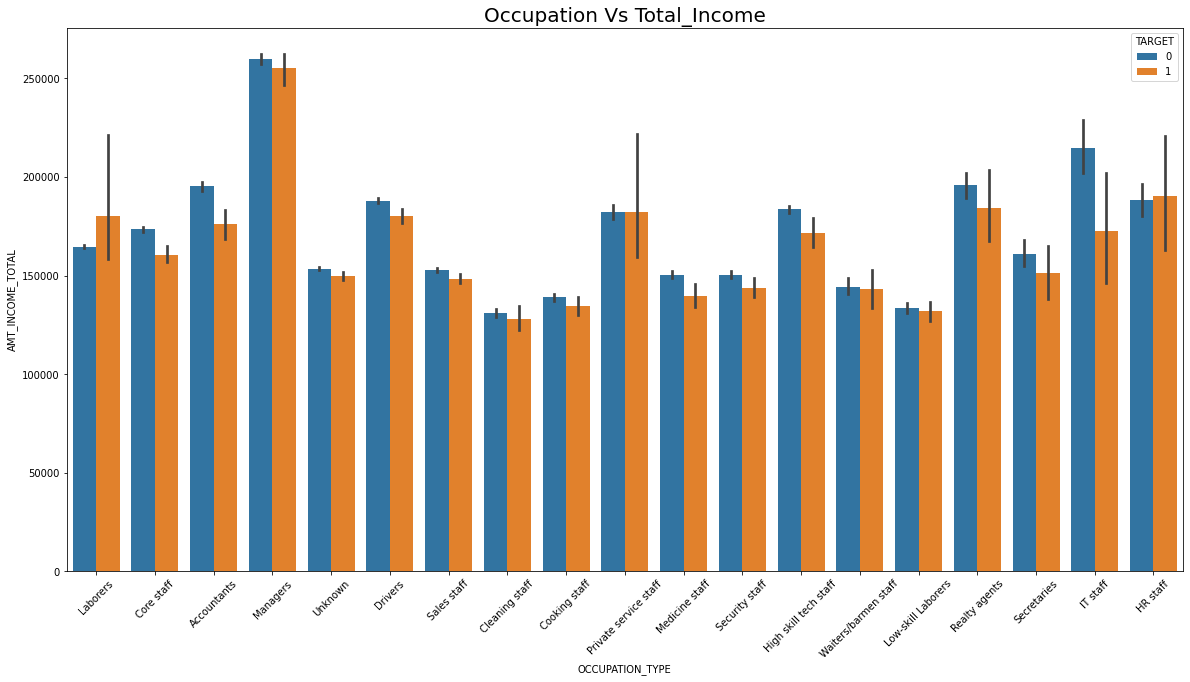

In [107]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'OCCUPATION_TYPE', y = 'AMT_INCOME_TOTAL', hue = 'TARGET', data = app_data_final, orient = "v")
plt.title('Occupation Vs Total_Income',size=20)
plt.xticks(rotation = 45)

#### Inference - Labourers, HR Staff are higher defaulters, 

#### Managers have high income

Text(0.5, 1.0, ' Total_Income  Vs Organisation')

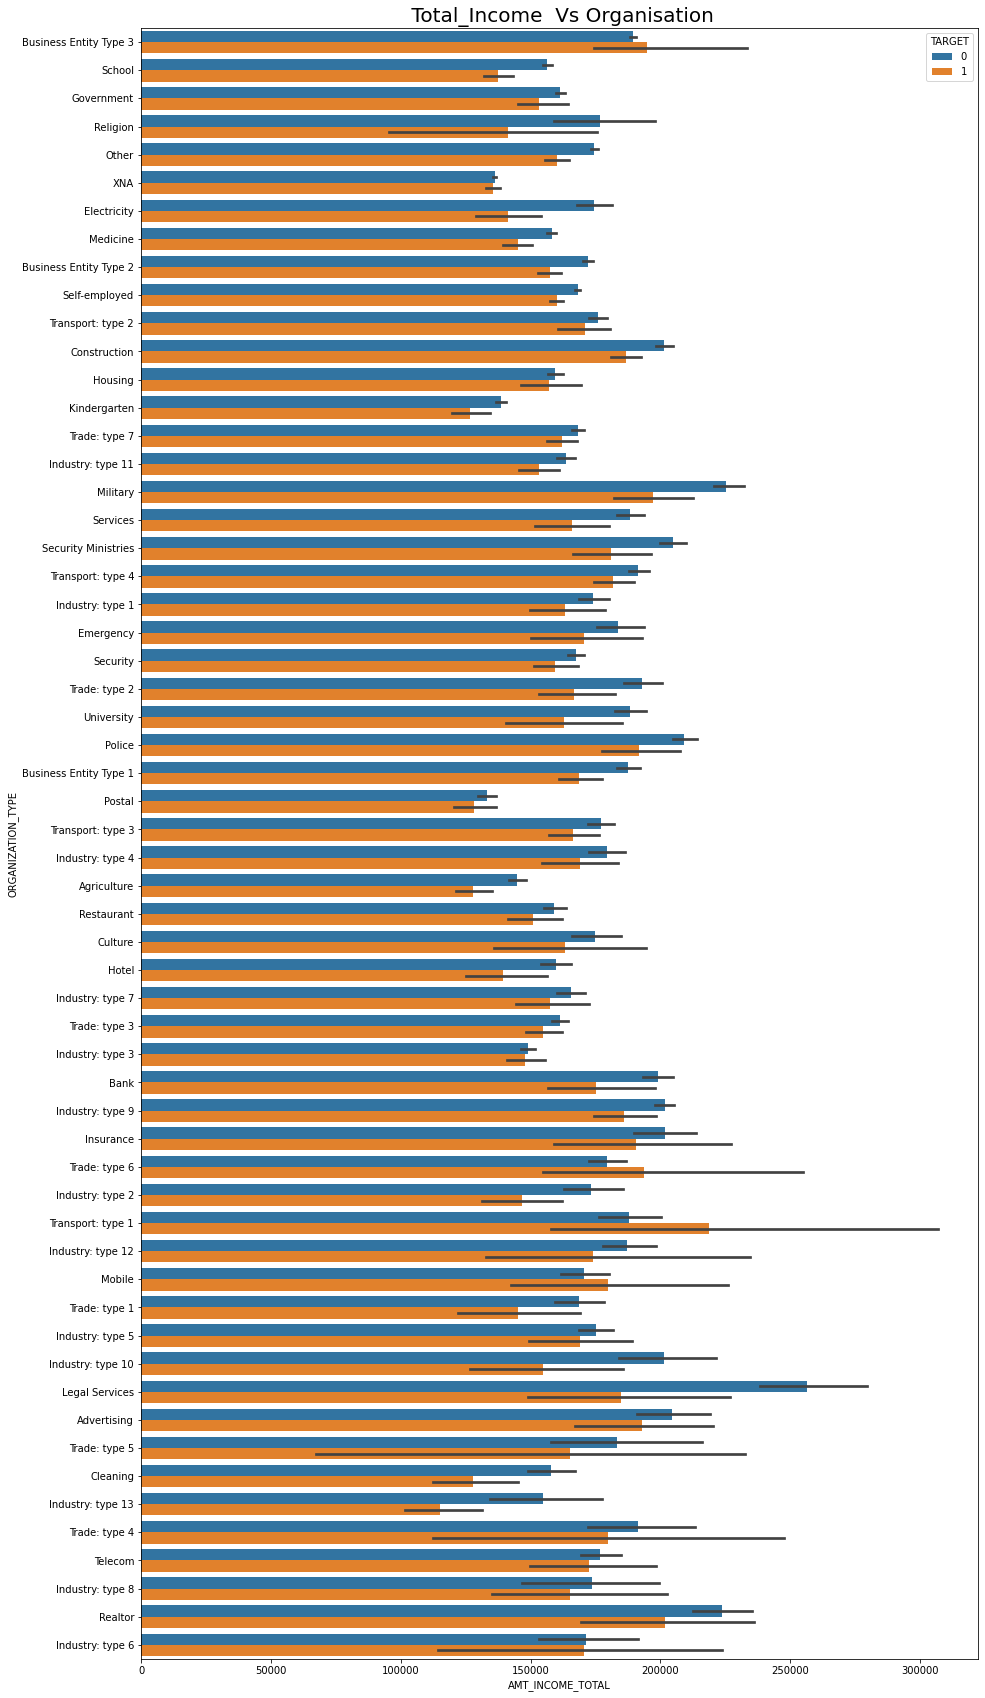

In [108]:
plt.figure(figsize=(15,30))
sns.barplot(x = 'AMT_INCOME_TOTAL' ,y = 'ORGANIZATION_TYPE' , hue = 'TARGET', data = app_data_final)
plt.title(' Total_Income  Vs Organisation',size=20)

#### Inference - Business Entity Type 3,  Transport type 1 and Mobile are higher Defaulters

Text(0.5, 1.0, 'Housing Type Vs Total_Income')

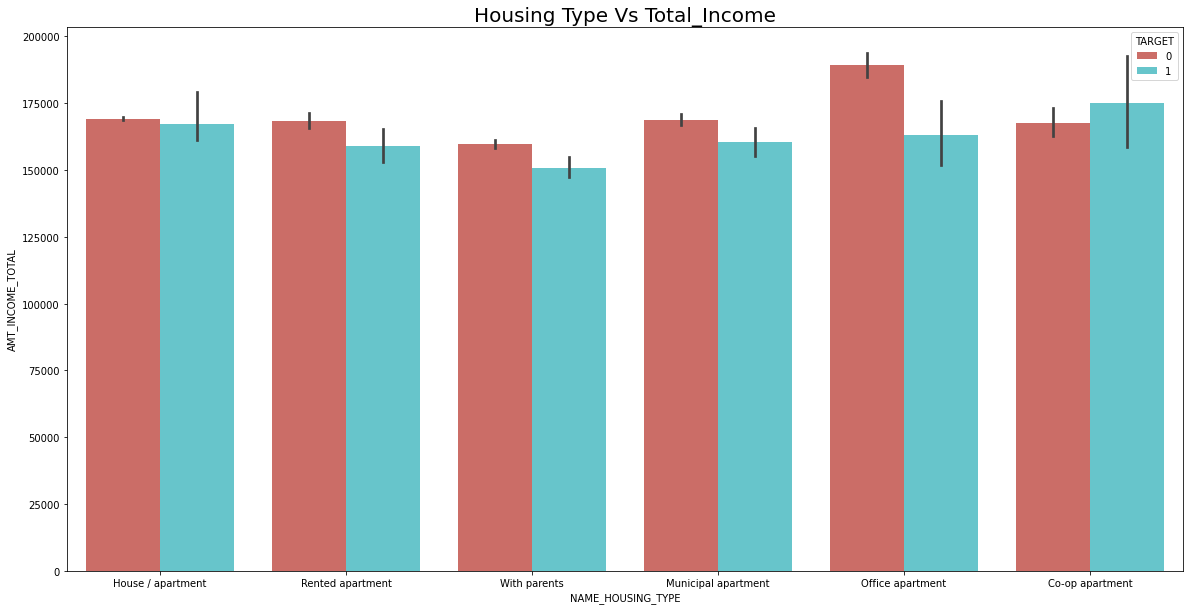

In [109]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'NAME_HOUSING_TYPE', y = 'AMT_INCOME_TOTAL', hue = 'TARGET', data = app_data_final, orient = "v", palette = 'hls')
plt.title('Housing Type Vs Total_Income',size=20)

#### Inference - Co-op Apartment are higher defaulters

Text(0.5, 1.0, 'Education Vs Total_Income')

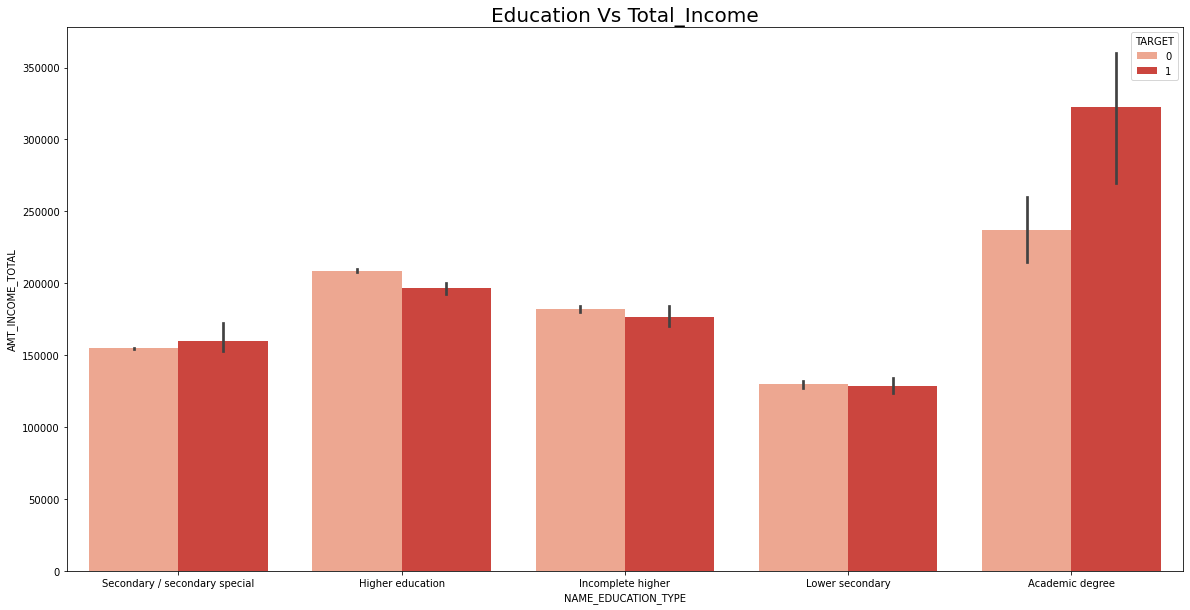

In [110]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_INCOME_TOTAL', hue = 'TARGET', data = app_data_final, orient = "v", palette = 'Reds')
plt.title('Education Vs Total_Income',size=20)

#### Inference - People with Academic degree are higher Defaulters

Text(0.5, 1.0, 'Education Vs Total_Income')

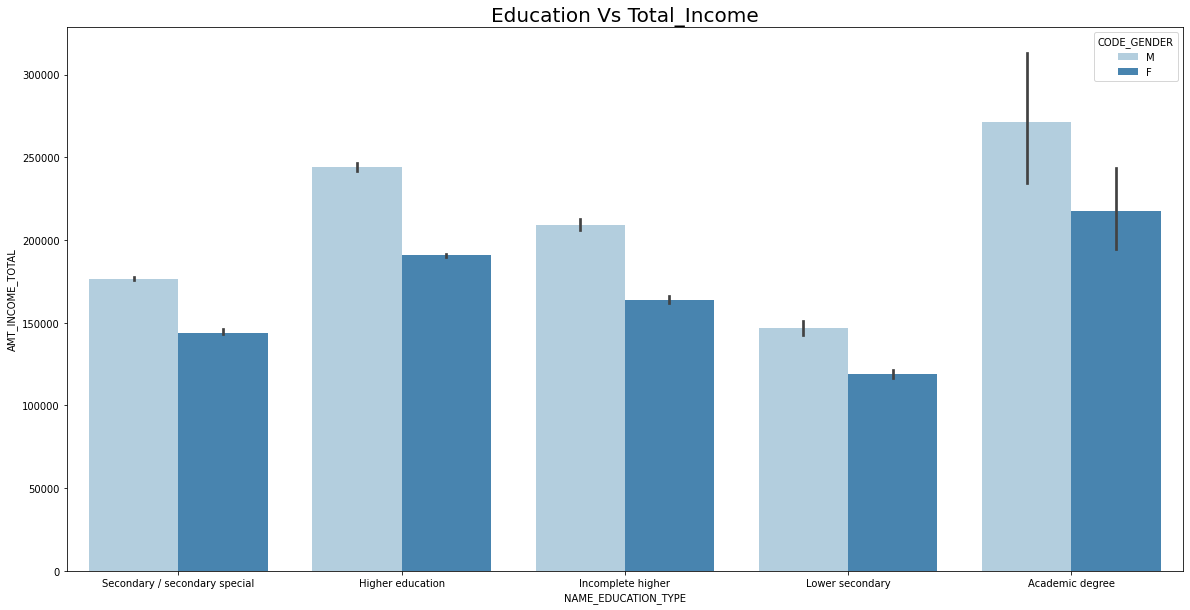

In [111]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_INCOME_TOTAL', hue = 'CODE_GENDER', data = app_data_final, orient = "v", palette = 'Blues')
plt.title('Education Vs Total_Income',size=20)

#### Inference - More educated Males apply for loan as compared to females

## 2. Analysis of 'previous_application.csv'

In [112]:
#Reading Data and checking Head
prev_data = pd.read_csv('previous_application.csv', encoding='latin1')
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
# Reading Transpose of Tail
prev_data.tail(4).T

,1670210,1670211,1670212,1670213
SK_ID_PREV,2357031,2659632,2785582,2418762
SK_ID_CURR,334635,249544,400317,261212
NAME_CONTRACT_TYPE,Consumer loans,Consumer loans,Cash loans,Cash loans
AMT_ANNUITY,6622.02,11520.9,18821.5,16431.3
AMT_APPLICATION,87750,105237,180000,360000
AMT_CREDIT,64291.5,102524,191880,360000
AMT_DOWN_PAYMENT,29250,10525.5,NaN,NaN
AMT_GOODS_PRICE,87750,105237,180000,360000
WEEKDAY_APPR_PROCESS_START,TUESDAY,MONDAY,WEDNESDAY,SUNDAY
HOUR_APPR_PROCESS_START,15,12,9,10


#### Shape

In [114]:
#Checking Shape
prev_data.shape

(1670214, 37)

#### Info and data Types

In [115]:
# Concise summary of a DataFrame and Data Types

prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

#### Describe

In [116]:
#Generate descriptive statistics that summarize the central tendency,
# dispersion and shape of a dataset's distribution, excluding``NaN`` values.

prev_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,1670214.0,1.923089e+06,532597.958696,1.000001e+06,1.461857e+06,1.923110e+06,2.384280e+06,2845382.000
SK_ID_CURR,1670214.0,2.783572e+05,102814.823849,1.000010e+05,1.893290e+05,2.787145e+05,3.675140e+05,456255.000
AMT_ANNUITY,1297979.0,1.595512e+04,14782.137335,0.000000e+00,6.321780e+03,1.125000e+04,2.065842e+04,418058.145
AMT_APPLICATION,1670214.0,1.752339e+05,292779.762387,0.000000e+00,1.872000e+04,7.104600e+04,1.803600e+05,6905160.000
AMT_CREDIT,1670213.0,1.961140e+05,318574.616546,0.000000e+00,2.416050e+04,8.054100e+04,2.164185e+05,6905160.000
AMT_DOWN_PAYMENT,774370.0,6.697402e+03,20921.495410,-9.000000e-01,0.000000e+00,1.638000e+03,7.740000e+03,3060045.000
AMT_GOODS_PRICE,1284699.0,2.278473e+05,315396.557937,0.000000e+00,5.084100e+04,1.123200e+05,2.340000e+05,6905160.000
HOUR_APPR_PROCESS_START,1670214.0,1.248418e+01,3.334028,0.000000e+00,1.000000e+01,1.200000e+01,1.500000e+01,23.000
NFLAG_LAST_APPL_IN_DAY,1670214.0,9.964675e-01,0.059330,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000
RATE_DOWN_PAYMENT,774370.0,7.963682e-02,0.107823,-1.497876e-05,0.000000e+00,5.160508e-02,1.089091e-01,1.000


#### Unique Values

In [117]:
# Checking Number of Unique values in each Column

prev_data.nunique()    

SK_ID_PREV                     1670214
SK_ID_CURR                      338857
NAME_CONTRACT_TYPE                   4
AMT_ANNUITY                     357959
AMT_APPLICATION                  93885
AMT_CREDIT                       86803
AMT_DOWN_PAYMENT                 29278
AMT_GOODS_PRICE                  93885
WEEKDAY_APPR_PROCESS_START           7
HOUR_APPR_PROCESS_START             24
FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
RATE_DOWN_PAYMENT               207033
RATE_INTEREST_PRIMARY              148
RATE_INTEREST_PRIVILEGED            25
NAME_CASH_LOAN_PURPOSE              25
NAME_CONTRACT_STATUS                 4
DAYS_DECISION                     2922
NAME_PAYMENT_TYPE                    4
CODE_REJECT_REASON                   9
NAME_TYPE_SUITE                      7
NAME_CLIENT_TYPE                     4
NAME_GOODS_CATEGORY                 28
NAME_PORTFOLIO                       5
NAME_PRODUCT_TYPE                    3
CHANNEL_TYPE             

### Missing Value Analysis

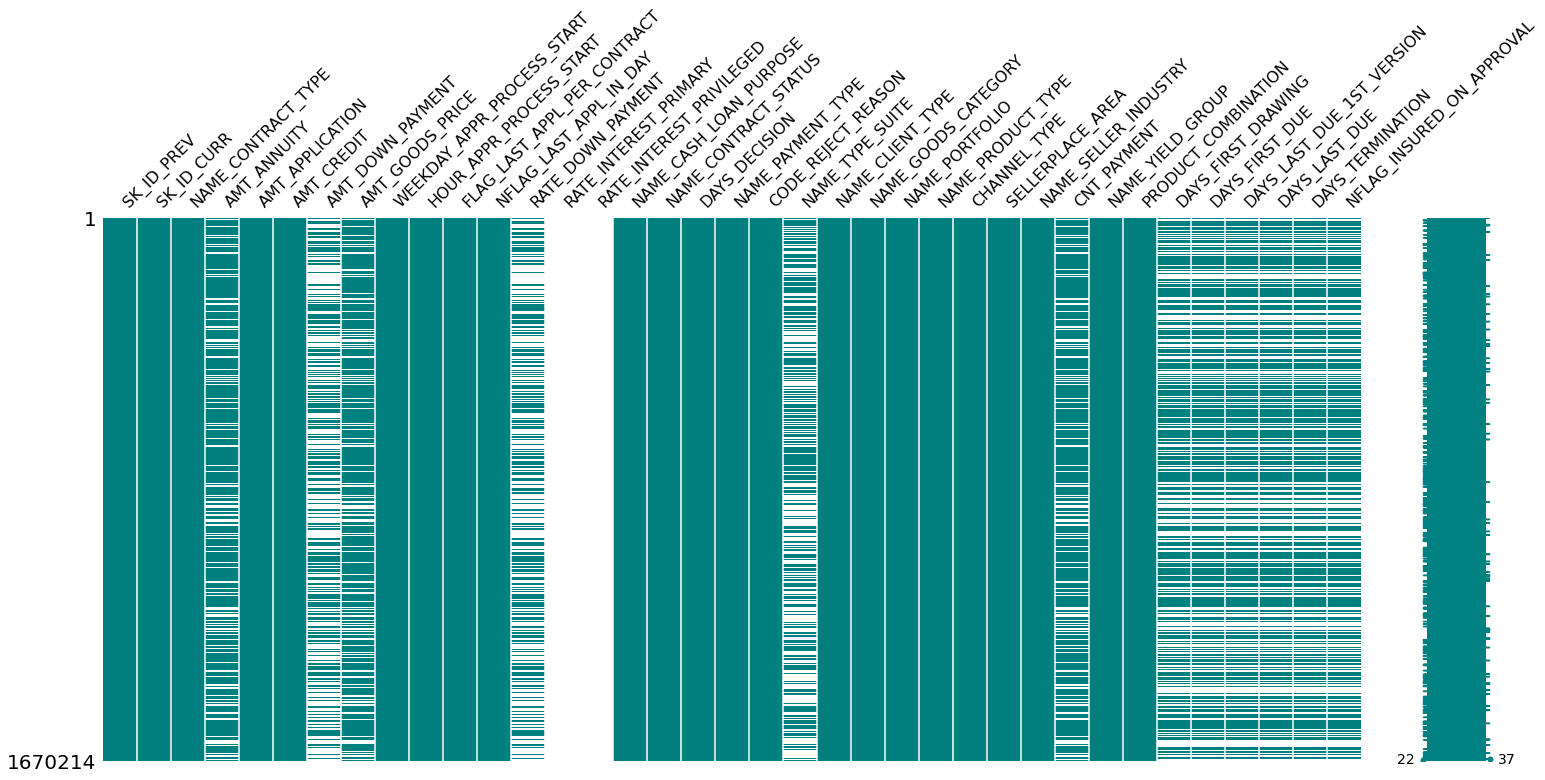

In [118]:
#Viewing Missing Values in Dataframe
# Missing values are seen in white color in each column
missingno.matrix(prev_data,color = (0.0, 0.5, 0.5))

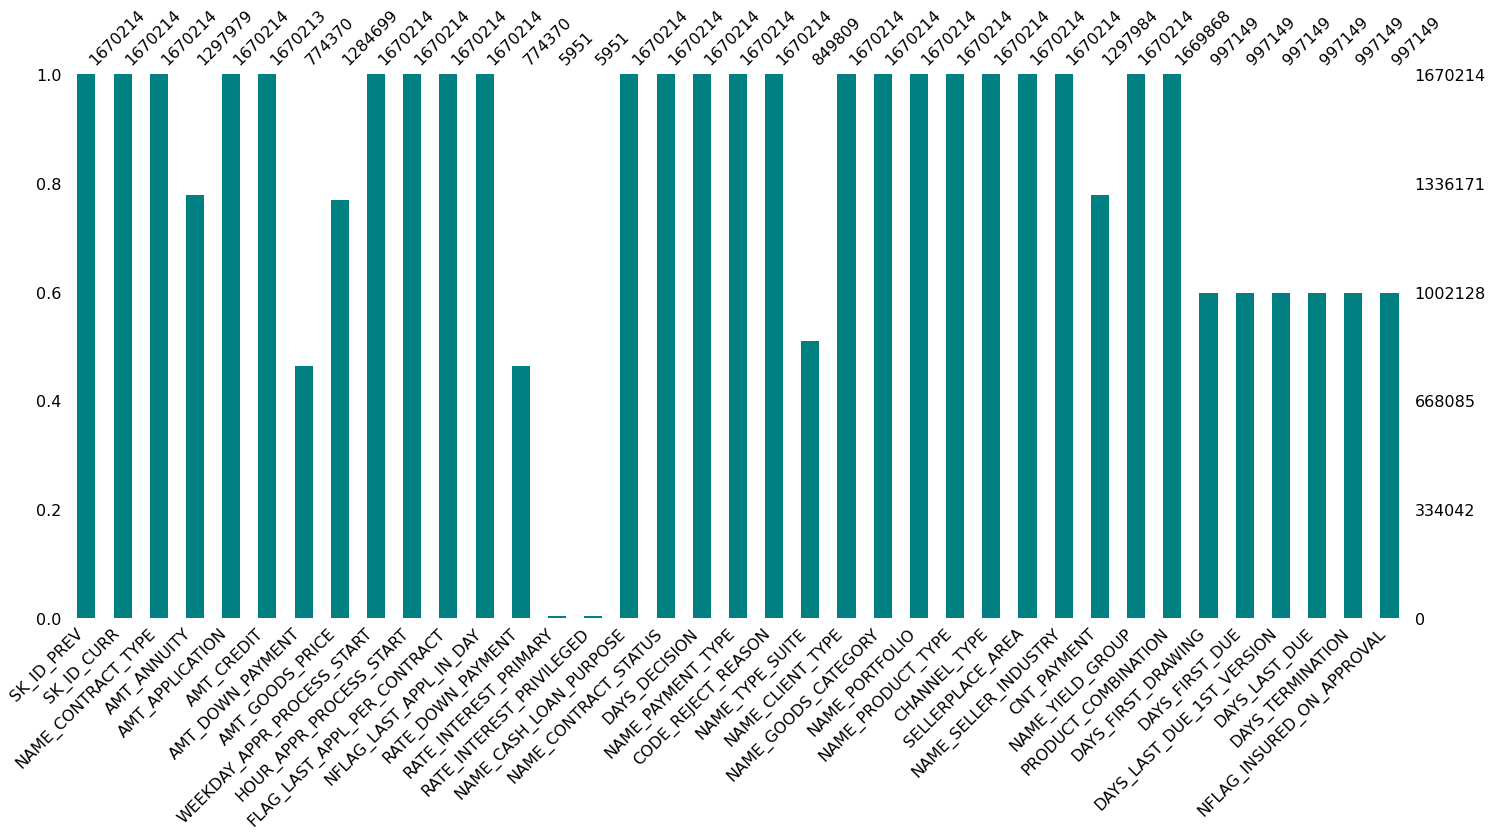

In [119]:
#Missing values in Barplot
missingno.bar(prev_data, color = (0.0, 0.5, 0.5))

In [120]:
# Sorting Null Values in Descending order
prev_data.isnull().sum().sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED       1664263
RATE_INTEREST_PRIMARY          1664263
RATE_DOWN_PAYMENT               895844
AMT_DOWN_PAYMENT                895844
NAME_TYPE_SUITE                 820405
DAYS_TERMINATION                673065
NFLAG_INSURED_ON_APPROVAL       673065
DAYS_FIRST_DRAWING              673065
DAYS_FIRST_DUE                  673065
DAYS_LAST_DUE_1ST_VERSION       673065
DAYS_LAST_DUE                   673065
AMT_GOODS_PRICE                 385515
AMT_ANNUITY                     372235
CNT_PAYMENT                     372230
PRODUCT_COMBINATION                346
AMT_CREDIT                           1
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
AMT_APPLICATION                      0
NAME_PAYMENT_TYPE                    0
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS     

In [121]:
# Missing Values Row Wise in Decreasing order
prev_data.isnull().sum(axis = 1).sort_values(ascending = False)

402355     15
545870     15
24543      15
205845     15
366790     15
           ..
394190      0
1223920     0
568426      0
376643      0
1462707     0
Length: 1670214, dtype: int64

#### Max no of missing values in row is 15

In [122]:
# Checking No. of Rows retained after removing all rows with Null Values
drop_app2 = prev_data.dropna(axis = 0)
drop_app2.shape

(71, 37)

#### If we drop all rows with null values remaing rows will be only 71 

In [123]:
# Finding % Column wise null value in Descending order
(prev_data.isnull().mean().sort_values(ascending = False)*100)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
RATE_DOWN_PAYMENT              53.636480
AMT_DOWN_PAYMENT               53.636480
NAME_TYPE_SUITE                49.119754
DAYS_TERMINATION               40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_FIRST_DRAWING             40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_LAST_DUE                  40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
AMT_APPLICATION                 0.000000
NAME_PAYMENT_TYPE               0.000000
NAME_CASH_LOAN_P

In [124]:
# Columns with more than 40% Missing Values

(prev_data.isnull().mean().sort_values(ascending = False)*100).index[:14]

Index(['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY', 'RATE_DOWN_PAYMENT', 'AMT_DOWN_PAYMENT', 'NAME_TYPE_SUITE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_PAYMENT'], dtype='object')

In [125]:
# Columns with 0% Missing Values

(prev_data.isnull().mean().sort_values(ascending = False)*100).index[14:]

Index(['PRODUCT_COMBINATION', 'AMT_CREDIT', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'AMT_APPLICATION', 'NAME_PAYMENT_TYPE', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'SK_ID_PREV'], dtype='object')

In [126]:
# Columns having > 20% missing values should be dropped from DataFrame

to_drop_prev = ['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY',
       'RATE_DOWN_PAYMENT', 'AMT_DOWN_PAYMENT', 'NAME_TYPE_SUITE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_PAYMENT']
prev_data.shape

(1670214, 37)

In [127]:
prev_data.drop(to_drop_prev,axis = 1,  inplace = True)
prev_data.shape

(1670214, 23)

### Checking and Analysing value_counts of each column

In [128]:
# Checking and Analysing value_counts of each column
prev_col2 = prev_data.columns.to_list()                            # Columns of DataFrame 
for j, i in enumerate(prev_col2):
    print('Column ', j, ' ',i )
    print(prev_data[i].value_counts())
    print('                                     ')
    print('*************************************')
    print('                                     ')

Column  0   SK_ID_PREV
1000983    1
2428426    1
1026910    1
1024863    1
2448896    1
          ..
1287969    1
1294114    1
1292067    1
1281828    1
1001961    1
Name: SK_ID_PREV, Length: 1670214, dtype: int64
                                     
*************************************
                                     
Column  1   SK_ID_CURR
187868    77
265681    73
173680    72
242412    68
206783    67
          ..
382489     1
426056     1
454726     1
380442     1
124145     1
Name: SK_ID_CURR, Length: 338857, dtype: int64
                                     
*************************************
                                     
Column  2   NAME_CONTRACT_TYPE
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64
                                     
*************************************
                                     
Column  3   AMT_APPLICATION
0.000         392402
45000.00

XNA                     855720
Consumer electronics    398265
Connectivity            276029
Furniture                57849
Construction             29781
Clothing                 23949
Industry                 19194
Auto technology           4990
Jewelry                   2709
MLM partners              1215
Tourism                    513
Name: NAME_SELLER_INDUSTRY, dtype: int64
                                     
*************************************
                                     
Column  21   NAME_YIELD_GROUP
XNA           517215
middle        385532
high          353331
low_normal    322095
low_action     92041
Name: NAME_YIELD_GROUP, dtype: int64
                                     
*************************************
                                     
Column  22   PRODUCT_COMBINATION
Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low     

### Inferences of column after checking value_counts
0.   SK_ID_PREV
1.   SK_ID_CURR
2.   NAME_CONTRACT_TYPE
>   'XNA' are very low so these rows can be dropped
3.   AMT_APPLICATION
4.   AMT_CREDIT
5.   WEEKDAY_APPR_PROCESS_START
6.   HOUR_APPR_PROCESS_START
7.   FLAG_LAST_APPL_PER_CONTRACT
>    Imbalance in Data , to be dropped
8.   NFLAG_LAST_APPL_IN_DAY
>    Imbalance in Data, to be dropped
9.   NAME_CASH_LOAN_PURPOSE
>    XAP, XNA too high , to be dropped
10.   NAME_CONTRACT_STATUS
11.   DAYS_DECISION
12.   NAME_PAYMENT_TYPE
>    XNA too high , , to be dropped
13.   CODE_REJECT_REASON
>    XAP too high , to be dropped
14.   NAME_CLIENT_TYPE
>   'XNA' are very low so these rows can be dropped
15.   NAME_GOODS_CATEGORY
>    'XNA' too high, , to be dropped
16.   NAME_PORTFOLIO
>    'XNA' too high, , to be dropped
17.   NAME_PRODUCT_TYPE
>    'XNA' too high, , to be dropped
18.   CHANNEL_TYPE
19.   SELLERPLACE_AREA
>    -1 too high , to be dropped
20.   NAME_SELLER_INDUSTRY
>    'XNA' too high, , to be dropped
21.   NAME_YIELD_GROUP
>    'XNA' too high, , to be dropped
22.   PRODUCT_COMBINATION

### Further analysis of missing values, outliers  is required to to completly discard the columns

### Missing Data Columns Analysis

In [129]:
#Checking Head
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,middle,POS mobile with interest
1,2802425,108129,Cash loans,607500.0,679671.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,112500.0,136444.5,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high,Cash X-Sell: high
3,2819243,176158,Cash loans,450000.0,470790.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,337500.0,404055.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high


In [130]:
# Finding sum of missing values in DataFrame

prev_data.isnull().sum()

SK_ID_PREV                       0
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
AMT_APPLICATION                  0
AMT_CREDIT                       1
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
FLAG_LAST_APPL_PER_CONTRACT      0
NFLAG_LAST_APPL_IN_DAY           0
NAME_CASH_LOAN_PURPOSE           0
NAME_CONTRACT_STATUS             0
DAYS_DECISION                    0
NAME_PAYMENT_TYPE                0
CODE_REJECT_REASON               0
NAME_CLIENT_TYPE                 0
NAME_GOODS_CATEGORY              0
NAME_PORTFOLIO                   0
NAME_PRODUCT_TYPE                0
CHANNEL_TYPE                     0
SELLERPLACE_AREA                 0
NAME_SELLER_INDUSTRY             0
NAME_YIELD_GROUP                 0
PRODUCT_COMBINATION            346
dtype: int64

In [131]:
prev_data.shape

(1670214, 23)

In [132]:
# Removing Null from 'PRODUCT_COMBINATION'
prev_data.dropna(subset = ['PRODUCT_COMBINATION', 'AMT_CREDIT'],axis = 0, inplace = True )
prev_data.shape

(1669867, 23)

In [133]:
# Checking % Null
prev_data.isnull().mean()*100

SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_APPLICATION                0.0
AMT_CREDIT                     0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CASH_LOAN_PURPOSE         0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_PAYMENT_TYPE              0.0
CODE_REJECT_REASON             0.0
NAME_CLIENT_TYPE               0.0
NAME_GOODS_CATEGORY            0.0
NAME_PORTFOLIO                 0.0
NAME_PRODUCT_TYPE              0.0
CHANNEL_TYPE                   0.0
SELLERPLACE_AREA               0.0
NAME_SELLER_INDUSTRY           0.0
NAME_YIELD_GROUP               0.0
PRODUCT_COMBINATION            0.0
dtype: float64

### Dropping Unnecessary Columns

In [134]:
# These columns are to be droped
prev_drop = ['FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE', 
'NAME_PAYMENT_TYPE','CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 
 'NAME_PRODUCT_TYPE','SELLERPLACE_AREA',  'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP']
prev_data.shape

(1669867, 23)

In [135]:
prev_data.drop(prev_drop, axis = 1, inplace = True)
prev_data.shape

(1669867, 11)

In [136]:
#Checking values of type "NAME_CONTRACT_TYPE"
prev_data['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193163
Name: NAME_CONTRACT_TYPE, dtype: int64

In [137]:
#Checking values of type "NAME_CONTRACT_STATUS"
# Contract status (approved, cancelled, ...) of previous application
prev_data['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036780
Canceled         316004
Refused          290647
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

### Making a copy of dataframe for analysis

In [138]:
prev_analyse = prev_data.copy()
prev_analyse.shape

(1669867, 11)

In [139]:
# Dropping Consumer loans as it is not there in applications_data
drop_consumer = prev_analyse[prev_analyse['NAME_CONTRACT_TYPE'] == 'Consumer loans']

In [140]:
#Checking shape
drop_consumer.shape

(729151, 11)

In [141]:
# Dropping Rows from column name 'NAME_CONTRACT_TYPE' having 'Consumer loans'
prev_analyse.drop(drop_consumer.index, inplace = True)

In [142]:
prev_analyse.shape

(940716, 11)

### Creating a target variable for the previous_application dataset named 'PREV_TARGET'

#### To create Target Variable we will use  NAME_CONTRACT_STATUS column
> Approved        = Target = 0 - Assuming the company makes decision by checking previous status

> Canceled        = We will not use

> Refused         = Target = 1 - Assuming the company has decided to reject because of default history

> Unused offer    = We will not use

In [143]:
# Dropping rows having Canceled in 'NAME_CONTRACT_STATUS'
drop_canceled = prev_analyse[prev_analyse['NAME_CONTRACT_STATUS'] == 'Canceled']
prev_analyse.drop(drop_canceled.index, inplace = True)
prev_analyse.shape

(626271, 11)

In [144]:
# Dropping rows having Canceled in 'NAME_CONTRACT_STATUS'
drop_unused = prev_analyse[prev_analyse['NAME_CONTRACT_STATUS'] == 'Unused offer']
prev_analyse.drop(drop_unused.index, inplace = True)
prev_analyse.shape

(625772, 11)

In [145]:
prev_analyse['NAME_CONTRACT_STATUS'].value_counts()

Approved    410310
Refused     215462
Name: NAME_CONTRACT_STATUS, dtype: int64

#### Creating New column 'PREV_TARGET'  - Approved = 0, Rejected = 1

In [146]:
prev_analyse['PREV_TARGET'] = prev_analyse['NAME_CONTRACT_STATUS'].apply(lambda x: 0 if x == 'Approved' else 1 )

In [147]:
#Checking Shape
prev_analyse.shape

(625772, 12)

In [148]:
#Checking Head
prev_analyse.head(4)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NAME_CONTRACT_STATUS,DAYS_DECISION,CHANNEL_TYPE,PRODUCT_COMBINATION,PREV_TARGET
1,2802425,108129,Cash loans,607500.0,679671.0,THURSDAY,11,Approved,-164,Contact center,Cash X-Sell: low,0
2,2523466,122040,Cash loans,112500.0,136444.5,TUESDAY,11,Approved,-301,Credit and cash offices,Cash X-Sell: high,0
3,2819243,176158,Cash loans,450000.0,470790.0,MONDAY,7,Approved,-512,Credit and cash offices,Cash X-Sell: middle,0
4,1784265,202054,Cash loans,337500.0,404055.0,THURSDAY,9,Refused,-781,Credit and cash offices,Cash Street: high,1


#### Dropping SK_ID_PREV, NAME_CONTRACT_STATUS

In [149]:
prev_analyse.drop(['SK_ID_PREV', 'NAME_CONTRACT_STATUS'], axis = 1, inplace = True)
prev_analyse.shape

(625772, 10)

#### Checking rows with same SK_ID_CURR

In [150]:
# Checking for duplicate rows

dupli_bool = prev_analyse.duplicated(subset = 'SK_ID_CURR', keep = False)
duplicate = prev_analyse.loc[dupli_bool == True]
duplicate.sort_values(by = 'SK_ID_CURR', ascending = True).head(10)

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,DAYS_DECISION,CHANNEL_TYPE,PRODUCT_COMBINATION,PREV_TARGET
900957,100006,Revolving loans,270000.0,270000.0,THURSDAY,15,-181,Credit and cash offices,Card X-Sell,0
1607443,100006,Cash loans,688500.0,906615.0,THURSDAY,15,-181,Credit and cash offices,Cash X-Sell: low,1
98162,100006,Cash loans,675000.0,675000.0,THURSDAY,15,-181,Credit and cash offices,Cash X-Sell: low,0
1131133,100006,Cash loans,454500.0,481495.5,SATURDAY,12,-438,Credit and cash offices,Cash X-Sell: high,0
13392,100007,Cash loans,180000.0,180000.0,SUNDAY,14,-865,Regional / Local,Cash Street: high,0
1483068,100007,Cash loans,202500.0,215865.0,THURSDAY,8,-1106,Country-wide,Cash X-Sell: middle,0
87569,100007,Cash loans,225000.0,284400.0,FRIDAY,13,-867,AP+ (Cash loan),Cash X-Sell: middle,0
693308,100007,Cash loans,247500.0,274288.5,MONDAY,11,-374,Credit and cash offices,Cash X-Sell: middle,0
1033001,100011,Revolving loans,0.0,180000.0,SATURDAY,10,-2279,Contact center,Card X-Sell,0
268783,100011,Cash loans,0.0,0.0,WEDNESDAY,9,-1162,Credit and cash offices,Cash,1


#### We can see there are more than one rows with same 'SK_ID_CURR'

In [151]:
duplicate.shape

(551189, 10)

### Plots to get Insight of data

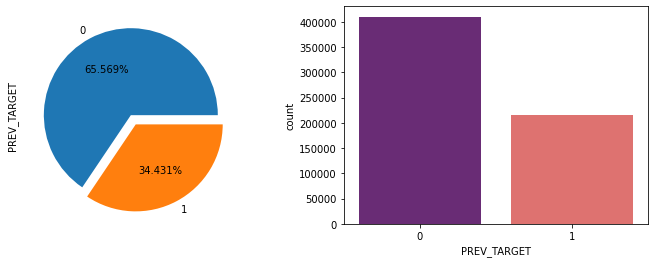

In [152]:
f, ax = plt.subplots(1, 2, figsize = (12,4))
prev_analyse.PREV_TARGET.value_counts().plot.pie(explode = [0,0.12], autopct = '%1.3f%%', ax = ax[0])
sns.countplot('PREV_TARGET',data = prev_analyse, palette = 'magma' )
plt.show()

#### Inference - This Dataset is more balanced than Application_data, 0 is Approved and 1is Rejected

### Splitting The dataset by Target

In [153]:
prev_analyse.shape

(625772, 10)

#### Creating Dataframe for PREV_TARGET = 1

In [154]:
#Splitting Da#Splitting Dataset by TARGET == 1

prev_analyse1 = prev_analyse[prev_analyse['PREV_TARGET'] == 1]
prev_analyse1.shape


(215462, 10)

#### Creating Dataframe for PREV_TARGET = 0

In [155]:
#Splitting Dataset by PREV_TARGET == 1

prev_analyse0 = prev_analyse[prev_analyse['PREV_TARGET'] == 0]
prev_analyse0.shape


(410310, 10)

### Plotting Correlation

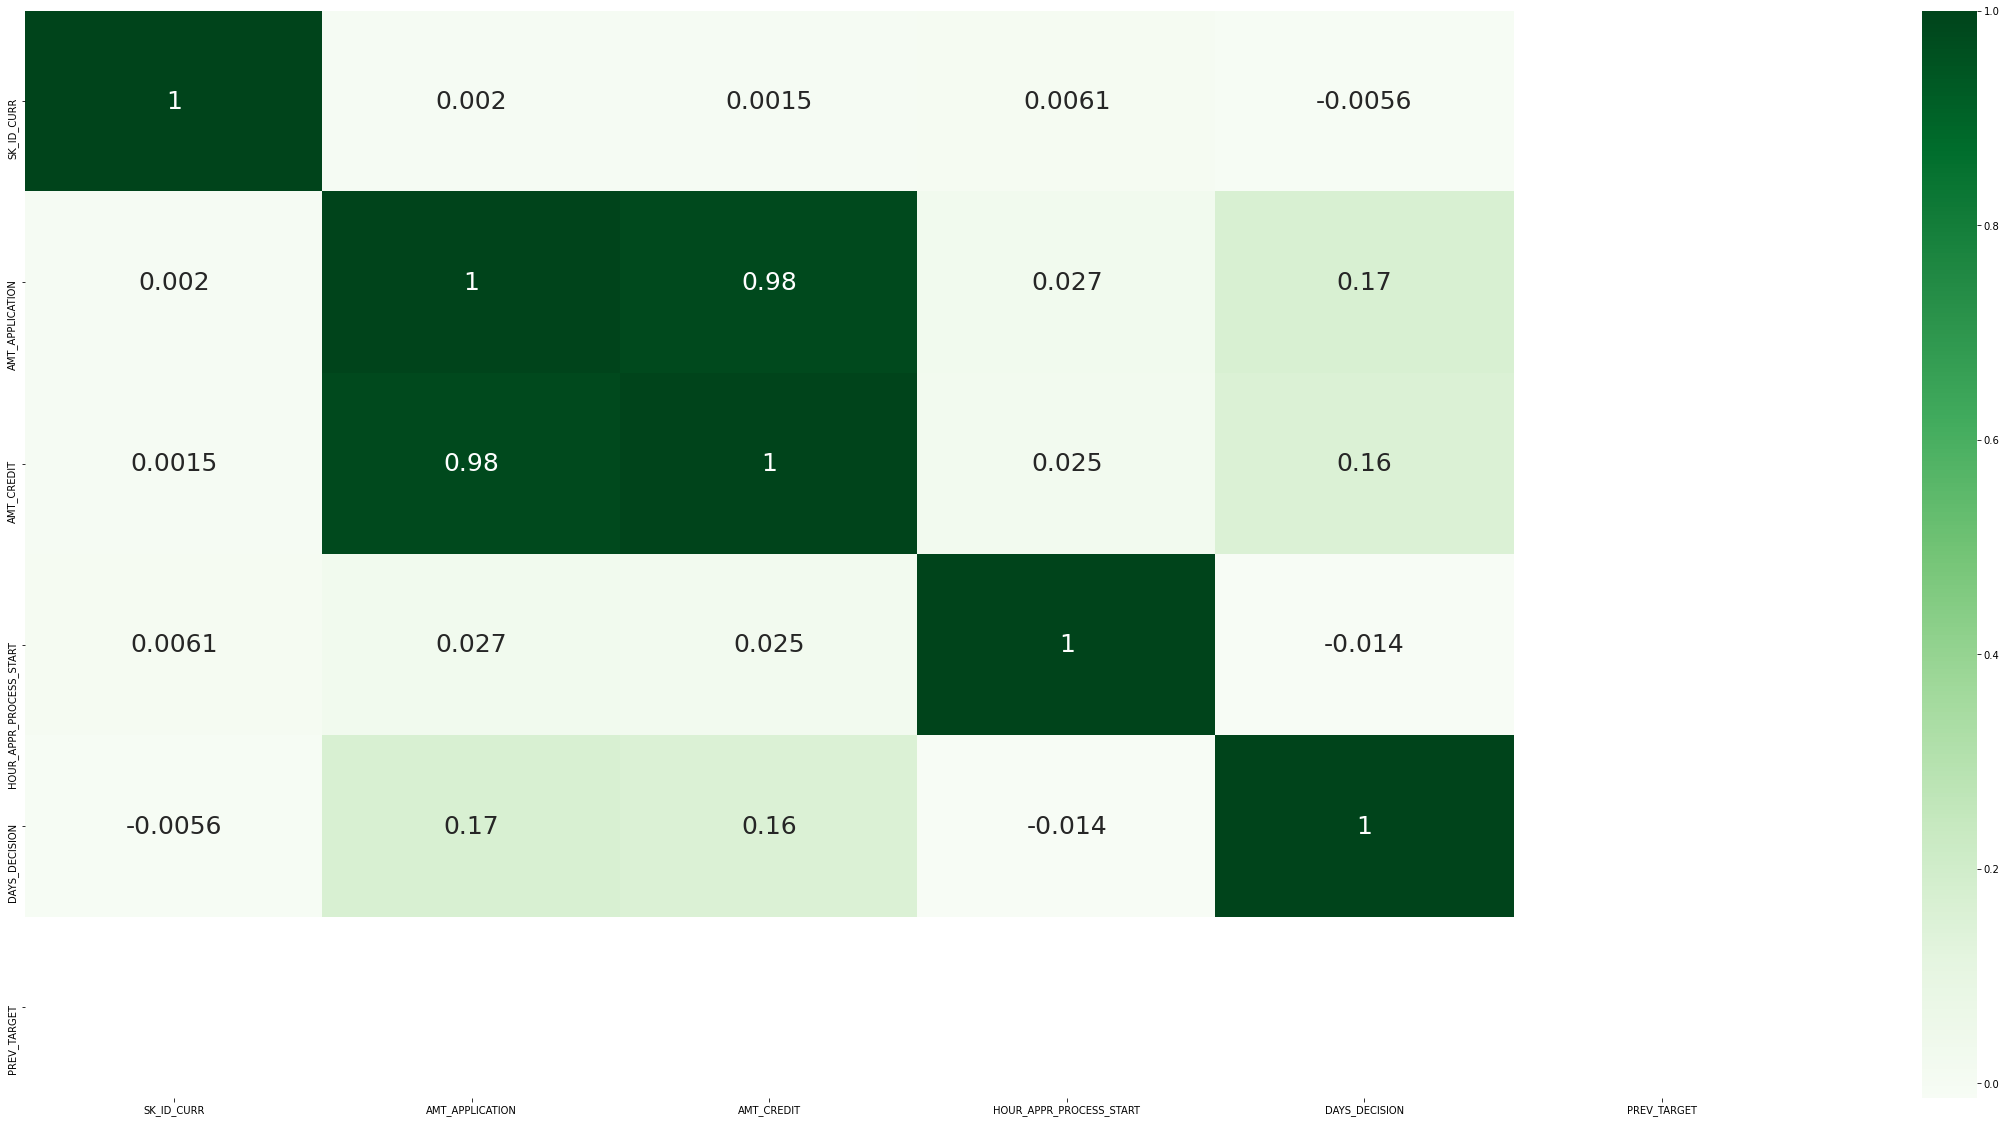

In [156]:
plt.figure(figsize = (40, 20))
sns.heatmap(prev_analyse1.corr(), cmap = 'Greens', annot = True,annot_kws={"size":25} )

#### Inference - 'AMT_CREDIT' is highly correlated to 'AMT_APPLICATION'

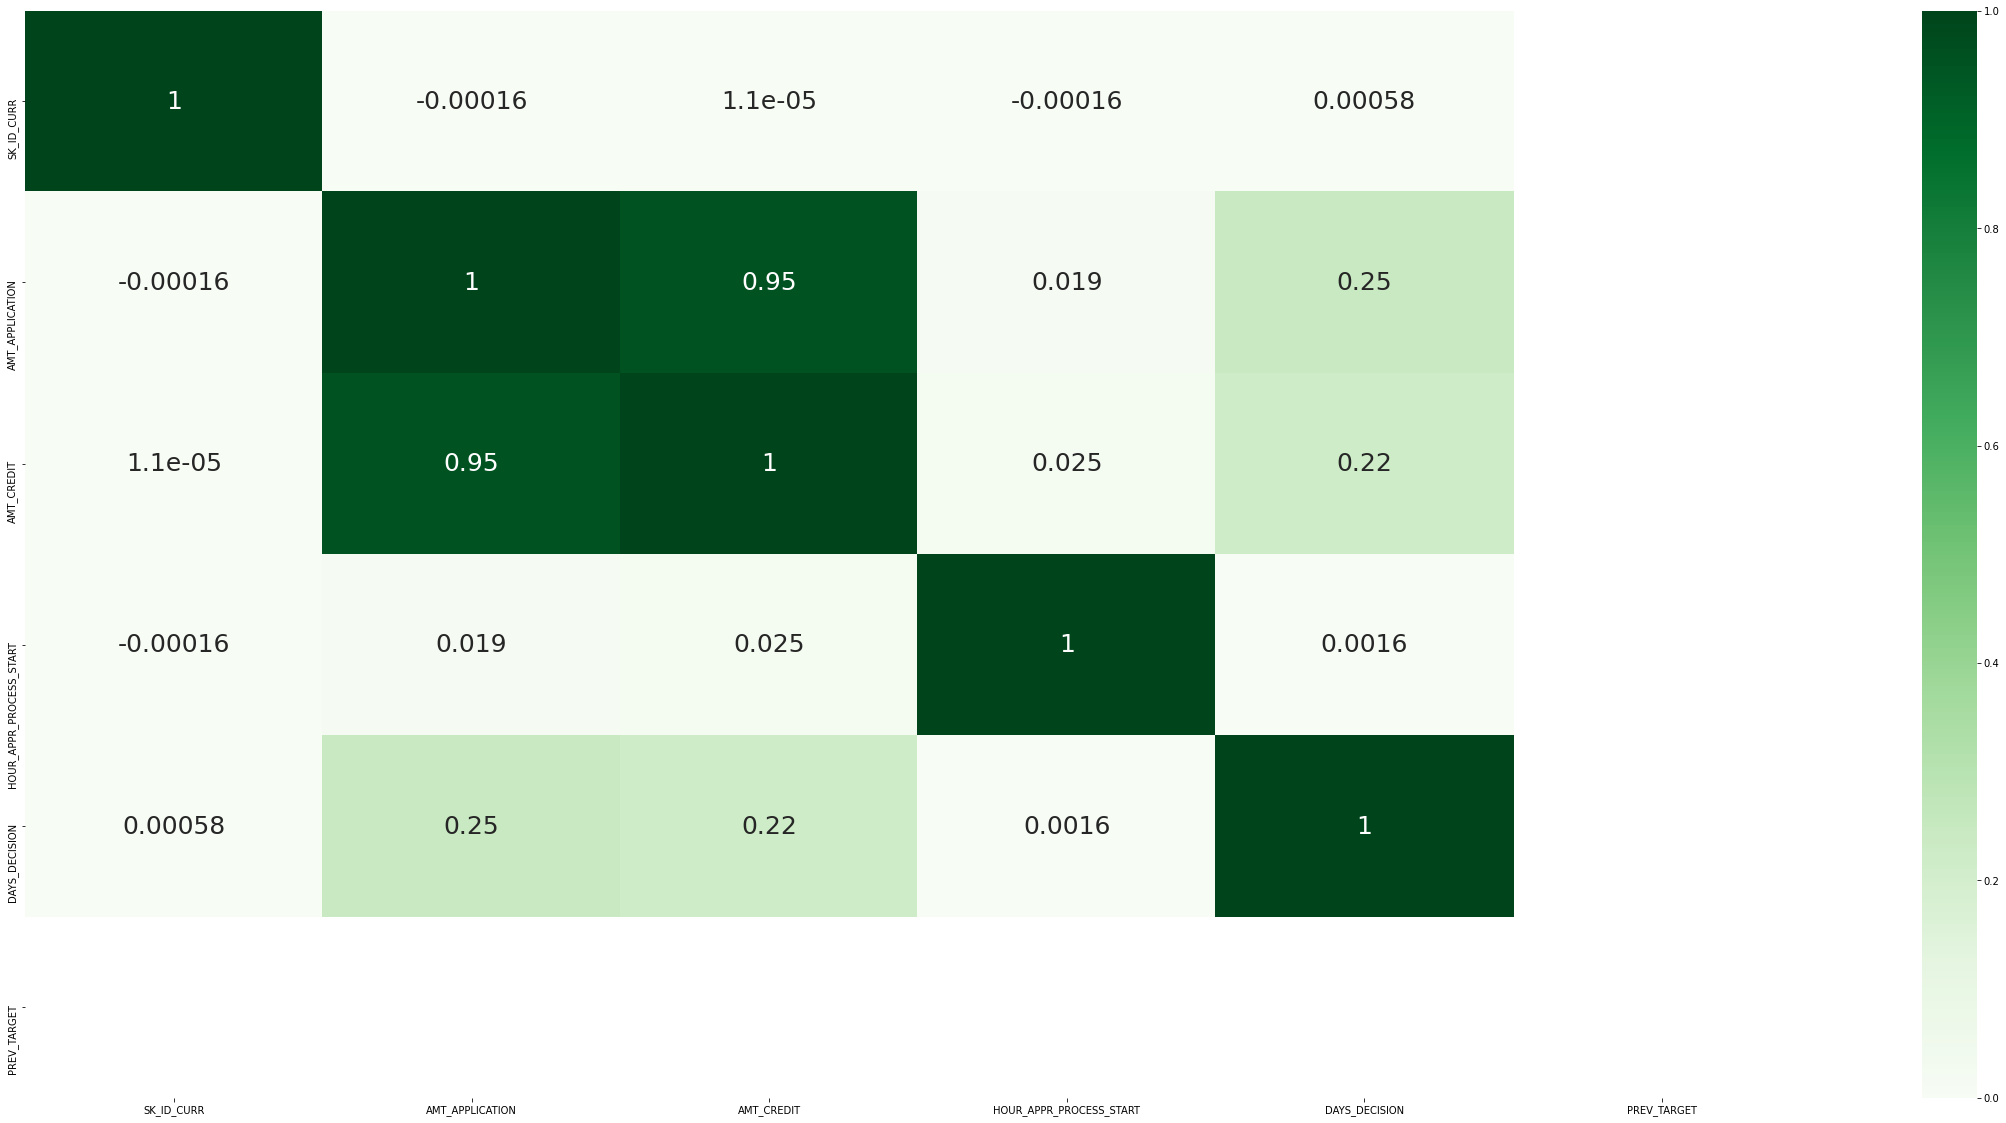

In [157]:
plt.figure(figsize = (40, 20))
sns.heatmap(prev_analyse0.corr(), cmap = 'Greens', annot = True, annot_kws={"size":25}
)

#### Inference - 'AMT_CREDIT' and 'AMT_APPLICATION' are correlated to 'DAYS_DECISION'

### Plots to get Insight into Data

Text(0.5, 1.0, ' Contract_Type  Vs Amt_Application')

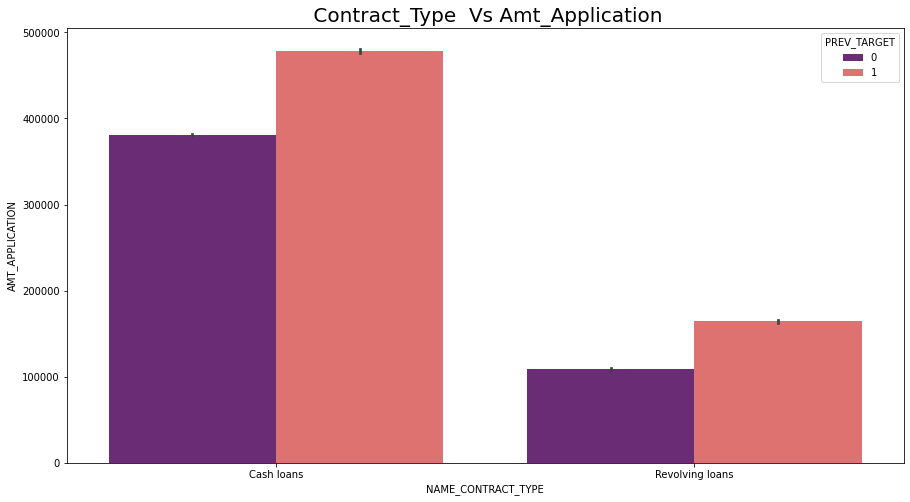

In [158]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'NAME_CONTRACT_TYPE' ,y = 'AMT_APPLICATION' , hue = 'PREV_TARGET', data = prev_analyse, palette = 'magma')
plt.title(' Contract_Type  Vs Amt_Application',size=20)

#### Inference- More cash loans were passed compared to revolving loans

## 3. Merging of Two Dataframes app_data_final and prev_analyse

In [159]:
merged_inner = pd.merge(left=app_data_final, right=prev_analyse, 
                        left_on='SK_ID_CURR', right_on='SK_ID_CURR', 
                        suffixes=('_Current', '_Previous'))
merged_inner.shape


(527063, 52)

#### Selecting columns after removing highly correlated columns

In [160]:
merged_final = merged_inner[['SK_ID_CURR', 'NAME_CONTRACT_TYPE_Current', 'CODE_GENDER', 
                            'ORGANIZATION_TYPE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 
                              'NAME_TYPE_SUITE', 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 
                             'NAME_INCOME_TYPE', 'NAME_HOUSING_TYPE', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_Current', 
                             'AMT_ANNUITY', 'FLAG_OWN_CAR', 'FLAG_PHONE', 'FLAG_WORK_PHONE', 
                              'FLAG_OWN_REALTY', 'DAYS_ID_PUBLISH',  'DAYS_REGISTRATION',  'DAYS_BIRTH', 
                             'DAYS_LAST_PHONE_CHANGE', 'EXT_SOURCE_2', 'REGION_POPULATION_RELATIVE', 
                             'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'REGION_RATING_CLIENT_W_CITY', 
                             'LIVE_CITY_NOT_WORK_CITY', 'WEEKDAY_APPR_PROCESS_START_Current', 
                             'HOUR_APPR_PROCESS_START_Current', 'OBS_30_CNT_SOCIAL_CIRCLE', 
                             'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 
                                'NAME_CONTRACT_TYPE_Previous', 'AMT_APPLICATION', 
                              'WEEKDAY_APPR_PROCESS_START_Previous', 'HOUR_APPR_PROCESS_START_Previous', 'DAYS_DECISION', 'CHANNEL_TYPE', 
                             'PRODUCT_COMBINATION', 'TARGET','PREV_TARGET']].copy()
merged_final.shape

(527063, 42)

In [161]:
merged_final.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE_Current,CODE_GENDER,ORGANIZATION_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,NAME_TYPE_SUITE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT_Current,AMT_ANNUITY,FLAG_OWN_CAR,FLAG_PHONE,FLAG_WORK_PHONE,FLAG_OWN_REALTY,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_BIRTH,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_2,REGION_POPULATION_RELATIVE,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REGION_RATING_CLIENT_W_CITY,LIVE_CITY_NOT_WORK_CITY,WEEKDAY_APPR_PROCESS_START_Current,HOUR_APPR_PROCESS_START_Current,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,NAME_CONTRACT_TYPE_Previous,AMT_APPLICATION,WEEKDAY_APPR_PROCESS_START_Previous,HOUR_APPR_PROCESS_START_Previous,DAYS_DECISION,CHANNEL_TYPE,PRODUCT_COMBINATION,TARGET,PREV_TARGET
0,100003,Cash loans,F,School,Core staff,2,Family,Married,Higher education,State servant,House / apartment,270000.0,1293502.5,35698.5,N,1,0,N,-291,-1186,-16765,-828.0,0.622246,0.003541,0,0,1,0,MONDAY,11,1.0,1.0,0.0,Cash loans,900000.0,FRIDAY,12,-746,Credit and cash offices,Cash X-Sell: low,0,0
1,100006,Cash loans,F,Business Entity Type 3,Laborers,2,Unaccompanied,Civil marriage,Secondary / secondary special,Working,House / apartment,135000.0,312682.5,29686.5,N,0,0,Y,-2437,-9833,-19005,-617.0,0.650442,0.008019,0,0,2,0,WEDNESDAY,17,2.0,2.0,0.0,Cash loans,675000.0,THURSDAY,15,-181,Credit and cash offices,Cash X-Sell: low,0,0
2,100006,Cash loans,F,Business Entity Type 3,Laborers,2,Unaccompanied,Civil marriage,Secondary / secondary special,Working,House / apartment,135000.0,312682.5,29686.5,N,0,0,Y,-2437,-9833,-19005,-617.0,0.650442,0.008019,0,0,2,0,WEDNESDAY,17,2.0,2.0,0.0,Revolving loans,270000.0,THURSDAY,15,-181,Credit and cash offices,Card X-Sell,0,0
3,100006,Cash loans,F,Business Entity Type 3,Laborers,2,Unaccompanied,Civil marriage,Secondary / secondary special,Working,House / apartment,135000.0,312682.5,29686.5,N,0,0,Y,-2437,-9833,-19005,-617.0,0.650442,0.008019,0,0,2,0,WEDNESDAY,17,2.0,2.0,0.0,Cash loans,454500.0,SATURDAY,12,-438,Credit and cash offices,Cash X-Sell: high,0,0
4,100006,Cash loans,F,Business Entity Type 3,Laborers,2,Unaccompanied,Civil marriage,Secondary / secondary special,Working,House / apartment,135000.0,312682.5,29686.5,N,0,0,Y,-2437,-9833,-19005,-617.0,0.650442,0.008019,0,0,2,0,WEDNESDAY,17,2.0,2.0,0.0,Cash loans,688500.0,THURSDAY,15,-181,Credit and cash offices,Cash X-Sell: low,0,1


In [162]:
#Checking for null 
merged_final.isnull().sum()

SK_ID_CURR                             0
NAME_CONTRACT_TYPE_Current             0
CODE_GENDER                            0
ORGANIZATION_TYPE                      0
OCCUPATION_TYPE                        0
CNT_FAM_MEMBERS                        0
NAME_TYPE_SUITE                        0
NAME_FAMILY_STATUS                     0
NAME_EDUCATION_TYPE                    0
NAME_INCOME_TYPE                       0
NAME_HOUSING_TYPE                      0
AMT_INCOME_TOTAL                       0
AMT_CREDIT_Current                     0
AMT_ANNUITY                            0
FLAG_OWN_CAR                           0
FLAG_PHONE                             0
FLAG_WORK_PHONE                        0
FLAG_OWN_REALTY                        0
DAYS_ID_PUBLISH                        0
DAYS_REGISTRATION                      0
DAYS_BIRTH                             0
DAYS_LAST_PHONE_CHANGE                 0
EXT_SOURCE_2                           0
REGION_POPULATION_RELATIVE             0
REG_REGION_NOT_L

In [163]:
# Checking for duplicate rows

dupli_bool2 = merged_final.duplicated(subset = 'SK_ID_CURR', keep = False)
duplicate2 = merged_final.loc[dupli_bool2 == True]
duplicate2.sort_values(by = 'SK_ID_CURR', ascending = True).head(10)

,SK_ID_CURR,NAME_CONTRACT_TYPE_Current,CODE_GENDER,ORGANIZATION_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,NAME_TYPE_SUITE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT_Current,AMT_ANNUITY,FLAG_OWN_CAR,FLAG_PHONE,FLAG_WORK_PHONE,FLAG_OWN_REALTY,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_BIRTH,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_2,REGION_POPULATION_RELATIVE,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REGION_RATING_CLIENT_W_CITY,LIVE_CITY_NOT_WORK_CITY,WEEKDAY_APPR_PROCESS_START_Current,HOUR_APPR_PROCESS_START_Current,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,NAME_CONTRACT_TYPE_Previous,AMT_APPLICATION,WEEKDAY_APPR_PROCESS_START_Previous,HOUR_APPR_PROCESS_START_Previous,DAYS_DECISION,CHANNEL_TYPE,PRODUCT_COMBINATION,TARGET,PREV_TARGET
1,100006,Cash loans,F,Business Entity Type 3,Laborers,2,Unaccompanied,Civil marriage,Secondary / secondary special,Working,House / apartment,135000.0,312682.5,29686.5,N,0,0,Y,-2437,-9833,-19005,-617.0,0.650442,0.008019,0,0,2,0,WEDNESDAY,17,2.0,2.0,0.0,Cash loans,675000.0,THURSDAY,15,-181,Credit and cash offices,Cash X-Sell: low,0,0
2,100006,Cash loans,F,Business Entity Type 3,Laborers,2,Unaccompanied,Civil marriage,Secondary / secondary special,Working,House / apartment,135000.0,312682.5,29686.5,N,0,0,Y,-2437,-9833,-19005,-617.0,0.650442,0.008019,0,0,2,0,WEDNESDAY,17,2.0,2.0,0.0,Revolving loans,270000.0,THURSDAY,15,-181,Credit and cash offices,Card X-Sell,0,0
3,100006,Cash loans,F,Business Entity Type 3,Laborers,2,Unaccompanied,Civil marriage,Secondary / secondary special,Working,House / apartment,135000.0,312682.5,29686.5,N,0,0,Y,-2437,-9833,-19005,-617.0,0.650442,0.008019,0,0,2,0,WEDNESDAY,17,2.0,2.0,0.0,Cash loans,454500.0,SATURDAY,12,-438,Credit and cash offices,Cash X-Sell: high,0,0
4,100006,Cash loans,F,Business Entity Type 3,Laborers,2,Unaccompanied,Civil marriage,Secondary / secondary special,Working,House / apartment,135000.0,312682.5,29686.5,N,0,0,Y,-2437,-9833,-19005,-617.0,0.650442,0.008019,0,0,2,0,WEDNESDAY,17,2.0,2.0,0.0,Cash loans,688500.0,THURSDAY,15,-181,Credit and cash offices,Cash X-Sell: low,0,1
5,100007,Cash loans,M,Religion,Core staff,1,Unaccompanied,Single / not married,Secondary / secondary special,Working,House / apartment,121500.0,513000.0,21865.5,N,0,0,Y,-3458,-4311,-19932,-1106.0,0.322738,0.028663,0,0,2,1,THURSDAY,11,0.0,0.0,0.0,Cash loans,180000.0,SUNDAY,14,-865,Regional / Local,Cash Street: high,0,0
6,100007,Cash loans,M,Religion,Core staff,1,Unaccompanied,Single / not married,Secondary / secondary special,Working,House / apartment,121500.0,513000.0,21865.5,N,0,0,Y,-3458,-4311,-19932,-1106.0,0.322738,0.028663,0,0,2,1,THURSDAY,11,0.0,0.0,0.0,Cash loans,225000.0,FRIDAY,13,-867,AP+ (Cash loan),Cash X-Sell: middle,0,0
7,100007,Cash loans,M,Religion,Core staff,1,Unaccompanied,Single / not married,Secondary / secondary special,Working,House / apartment,121500.0,513000.0,21865.5,N,0,0,Y,-3458,-4311,-19932,-1106.0,0.322738,0.028663,0,0,2,1,THURSDAY,11,0.0,0.0,0.0,Cash loans,247500.0,MONDAY,11,-374,Credit and cash offices,Cash X-Sell: middle,0,0
8,100007,Cash loans,M,Religion,Core staff,1,Unaccompanied,Single / not married,Secondary / secondary special,Working,House / apartment,121500.0,513000.0,21865.5,N,0,0,Y,-3458,-4311,-19932,-1106.0,0.322738,0.028663,0,0,2,1,THURSDAY,11,0.0,0.0,0.0,Cash loans,202500.0,THURSDAY,8,-1106,Country-wide,Cash X-Sell: middle,0,0
10,100011,Cash loans,F,XNA,Unknown,2,Children,Married,Secondary / secondary special,Pensioner,House / apartment,112500.0,1019610.0,33826.5,N,0,0,Y,-3514,-7427,-20099,0.0,0.205747,0.018634,0,0,2,0,WEDNESDAY,14,1.0,1.0,0.0,Cash loans,0.0,WEDNESDAY,9,-1162,Credit and cash offices,Cash,0,1
11,100011,Cash loans,F,XNA,Unknown,2,Children,Married,Secondary / secondary special,Pensioner,House / apartment,112500.0,1019610.0,33826.5,N,0,0,Y,-3514,-7427,-20099,0.0,0.205747,0.018634,0,0,2,0,WEDNESDAY,14,1.0,1.0,0.0,Revolving loans,0.0,SATURDAY,10,-22

#### Binning Data

In [164]:
merged_final.DAYS_BIRTH.value_counts()

-15761    111
-20802    106
-11991    102
-14890    101
-16677    101
         ... 
-8128       1
-25164      1
-8076       1
-8498       1
-8387       1
Name: DAYS_BIRTH, Length: 16999, dtype: int64

In [165]:
# Making separate Work years column and binning
merged_final["AGE"] = abs(merged_final["DAYS_BIRTH"]//365)

bins = [0, 20, 30, 40, 50, 60, 75, 100]
labels =["0-20","20-30","30-40","40-50","50-60","60-75","75-90"]

merged_final['AGE_CAT'] = pd.cut(merged_final['AGE'], bins, labels=labels)
merged_final.head()


,SK_ID_CURR,NAME_CONTRACT_TYPE_Current,CODE_GENDER,ORGANIZATION_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,NAME_TYPE_SUITE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT_Current,AMT_ANNUITY,FLAG_OWN_CAR,FLAG_PHONE,FLAG_WORK_PHONE,FLAG_OWN_REALTY,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_BIRTH,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_2,REGION_POPULATION_RELATIVE,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REGION_RATING_CLIENT_W_CITY,LIVE_CITY_NOT_WORK_CITY,WEEKDAY_APPR_PROCESS_START_Current,HOUR_APPR_PROCESS_START_Current,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,NAME_CONTRACT_TYPE_Previous,AMT_APPLICATION,WEEKDAY_APPR_PROCESS_START_Previous,HOUR_APPR_PROCESS_START_Previous,DAYS_DECISION,CHANNEL_TYPE,PRODUCT_COMBINATION,TARGET,PREV_TARGET,AGE,AGE_CAT
0,100003,Cash loans,F,School,Core staff,2,Family,Married,Higher education,State servant,House / apartment,270000.0,1293502.5,35698.5,N,1,0,N,-291,-1186,-16765,-828.0,0.622246,0.003541,0,0,1,0,MONDAY,11,1.0,1.0,0.0,Cash loans,900000.0,FRIDAY,12,-746,Credit and cash offices,Cash X-Sell: low,0,0,46,40-50
1,100006,Cash loans,F,Business Entity Type 3,Laborers,2,Unaccompanied,Civil marriage,Secondary / secondary special,Working,House / apartment,135000.0,312682.5,29686.5,N,0,0,Y,-2437,-9833,-19005,-617.0,0.650442,0.008019,0,0,2,0,WEDNESDAY,17,2.0,2.0,0.0,Cash loans,675000.0,THURSDAY,15,-181,Credit and cash offices,Cash X-Sell: low,0,0,53,50-60
2,100006,Cash loans,F,Business Entity Type 3,Laborers,2,Unaccompanied,Civil marriage,Secondary / secondary special,Working,House / apartment,135000.0,312682.5,29686.5,N,0,0,Y,-2437,-9833,-19005,-617.0,0.650442,0.008019,0,0,2,0,WEDNESDAY,17,2.0,2.0,0.0,Revolving loans,270000.0,THURSDAY,15,-181,Credit and cash offices,Card X-Sell,0,0,53,50-60
3,100006,Cash loans,F,Business Entity Type 3,Laborers,2,Unaccompanied,Civil marriage,Secondary / secondary special,Working,House / apartment,135000.0,312682.5,29686.5,N,0,0,Y,-2437,-9833,-19005,-617.0,0.650442,0.008019,0,0,2,0,WEDNESDAY,17,2.0,2.0,0.0,Cash loans,454500.0,SATURDAY,12,-438,Credit and cash offices,Cash X-Sell: high,0,0,53,50-60
4,100006,Cash loans,F,Business Entity Type 3,Laborers,2,Unaccompanied,Civil marriage,Secondary / secondary special,Working,House / apartment,135000.0,312682.5,29686.5,N,0,0,Y,-2437,-9833,-19005,-617.0,0.650442,0.008019,0,0,2,0,WEDNESDAY,17,2.0,2.0,0.0,Cash loans,688500.0,THURSDAY,15,-181,Credit and cash offices,Cash X-Sell: low,0,1,53,50-60


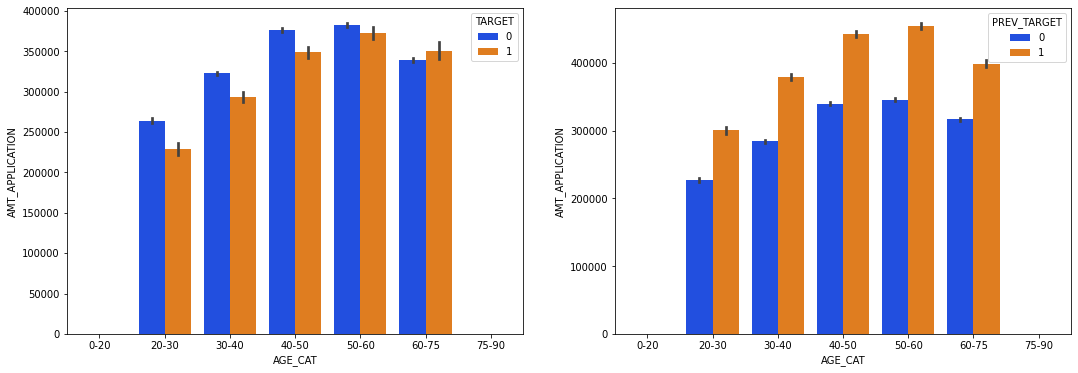

In [166]:
#Plotting AGE_CAT Vs AMT_APPLICATION
plt.figure(figsize=(18,6))
plt.subplot(1,2, 1)
sns.barplot(x="AGE_CAT", y="AMT_APPLICATION", hue="TARGET", data = merged_final, palette = "bright")
plt.subplot(1,2, 2)
sns.barplot(x="AGE_CAT", y="AMT_APPLICATION", hue="PREV_TARGET", data = merged_final, palette = "bright")

#### Inference - People with age 40 - 60 take more loan, people above 60 are defaulters

<Figure size 2160x1440 with 0 Axes>

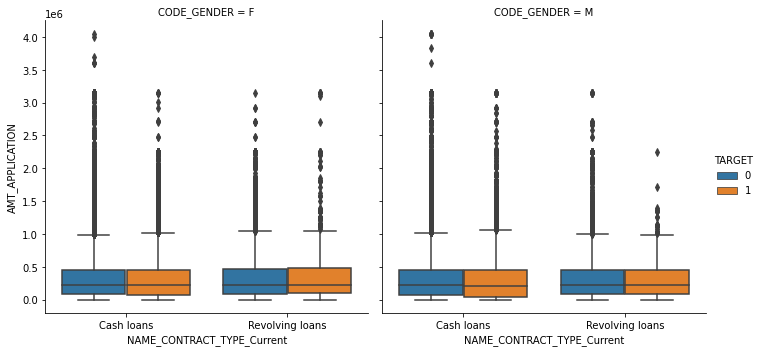

In [167]:
# Catplot of application_data Contract_Type va Amt_Application
plt.figure(figsize=(30,20))
sns.catplot(x="NAME_CONTRACT_TYPE_Current", y="AMT_APPLICATION", hue="TARGET",
            col="CODE_GENDER",    kind="box", data=merged_final)


<Figure size 2160x1440 with 0 Axes>

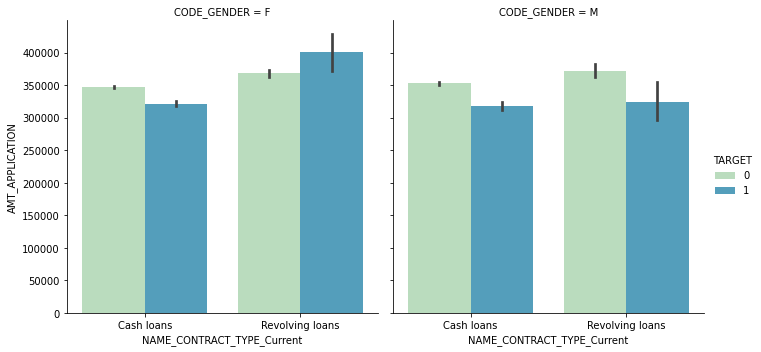

In [168]:
# Catplot of previous_data Contract_Type Vs Amt_Application
plt.figure(figsize=(30,20))
sns.catplot(x="NAME_CONTRACT_TYPE_Current", y="AMT_APPLICATION", hue="TARGET",
             col="CODE_GENDER",    kind="bar", data=merged_final, palette = "GnBu")

#### Inference - Females have opted for Higher Revolving Loans  and are more likely to  default than males.

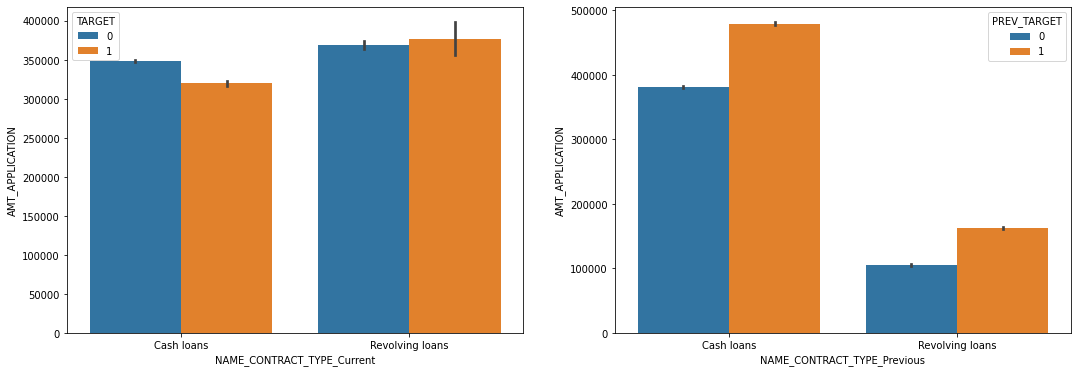

In [169]:
plt.figure(figsize=(18,6))
plt.subplot(1,2, 1)
sns.barplot(x="NAME_CONTRACT_TYPE_Current", y="AMT_APPLICATION", hue="TARGET", data=merged_inner)
plt.subplot(1, 2, 2)
sns.barplot(x="NAME_CONTRACT_TYPE_Previous", y="AMT_APPLICATION", hue="PREV_TARGET", data=merged_inner)

#### Inference - Revolving loans of higher amount are applied in current application compared to previous application.

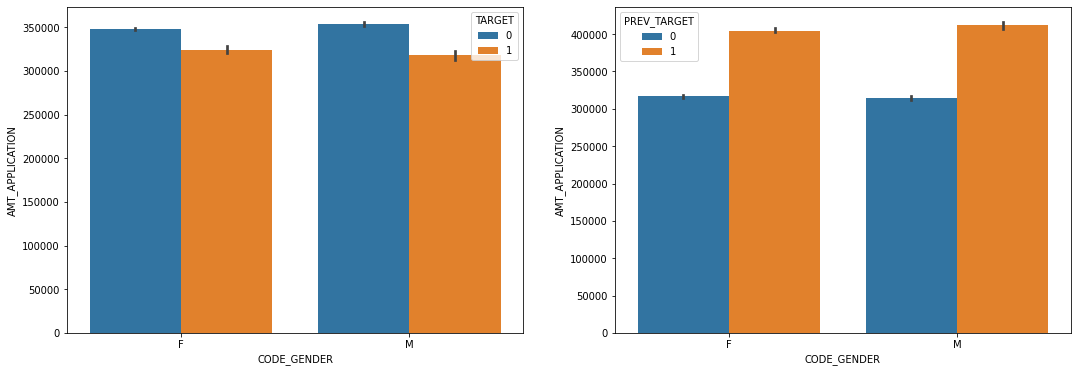

In [170]:
plt.figure(figsize=(18,6))
plt.subplot(1,2, 1)
sns.barplot(x="CODE_GENDER", y="AMT_APPLICATION", hue="TARGET", data=merged_final)
plt.subplot(1, 2, 2)
sns.barplot(x="CODE_GENDER", y="AMT_APPLICATION", hue="PREV_TARGET", data=merged_final)

#### Inference - There are more applications that are approved currently.

Text(0, 0.5, 'Annuity')

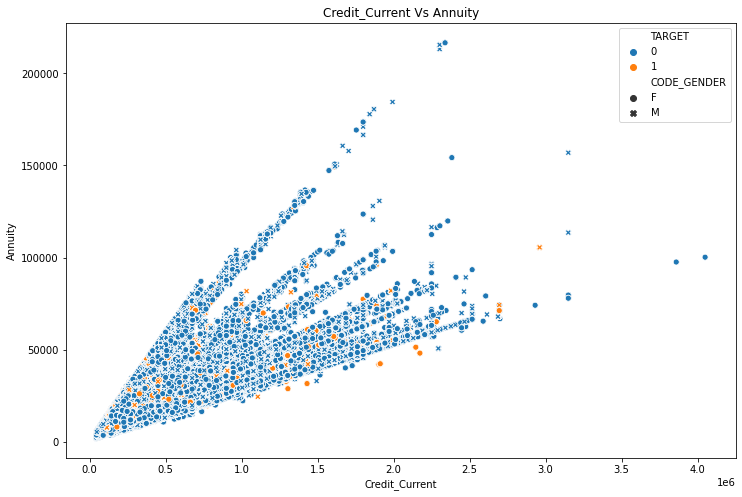

In [171]:
plt.figure(figsize = (12, 8))
sns.scatterplot(data = merged_final,
               x = 'AMT_CREDIT_Current', 
               y = 'AMT_ANNUITY',
               hue = 'TARGET', 
               style = 'CODE_GENDER')
plt.title("Credit_Current Vs Annuity")
plt.xlabel("Credit_Current")
plt.ylabel("Annuity")

#### Inference - Amt_credit and Amt_Annuity have Linear relationship

Text(45.125, 0.5, 'Amt_Annuity')

<Figure size 864x576 with 0 Axes>

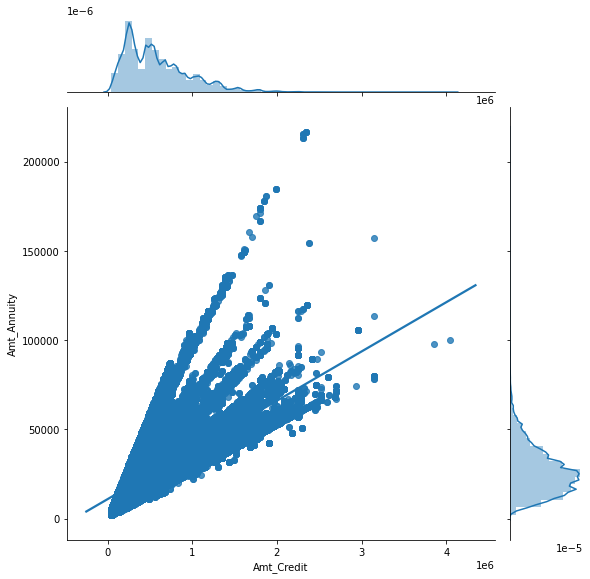

In [172]:
plt.figure(figsize = (12, 8))
sns.jointplot(x = "AMT_CREDIT_Current", y = "AMT_ANNUITY", data=merged_final, kind="reg", height = 8, )
plt.xlabel("Amt_Credit")
plt.ylabel("Amt_Annuity")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]),
 <a list of 58 Text major ticklabel objects>)

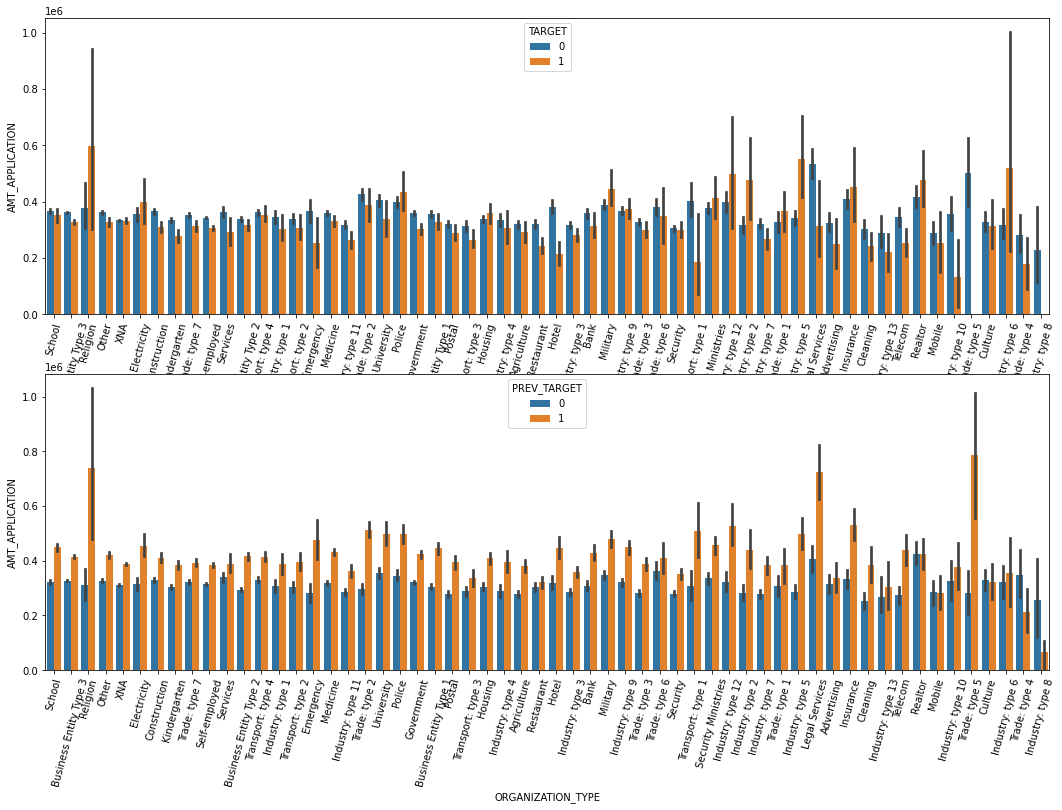

In [173]:
plt.figure(figsize=(18,12))
plt.subplot(2,1, 1)
sns.barplot(x="ORGANIZATION_TYPE", y="AMT_APPLICATION", hue="TARGET", data=merged_final)
plt.xticks(rotation = 75)
plt.subplot(2, 1, 2)
sns.barplot(x="ORGANIZATION_TYPE", y="AMT_APPLICATION", hue="PREV_TARGET", data=merged_final)
plt.xticks(rotation = 75)

#### Inference - Industry Type 2, 5 12 , Legal Services, Religion are high defaulters of loan

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

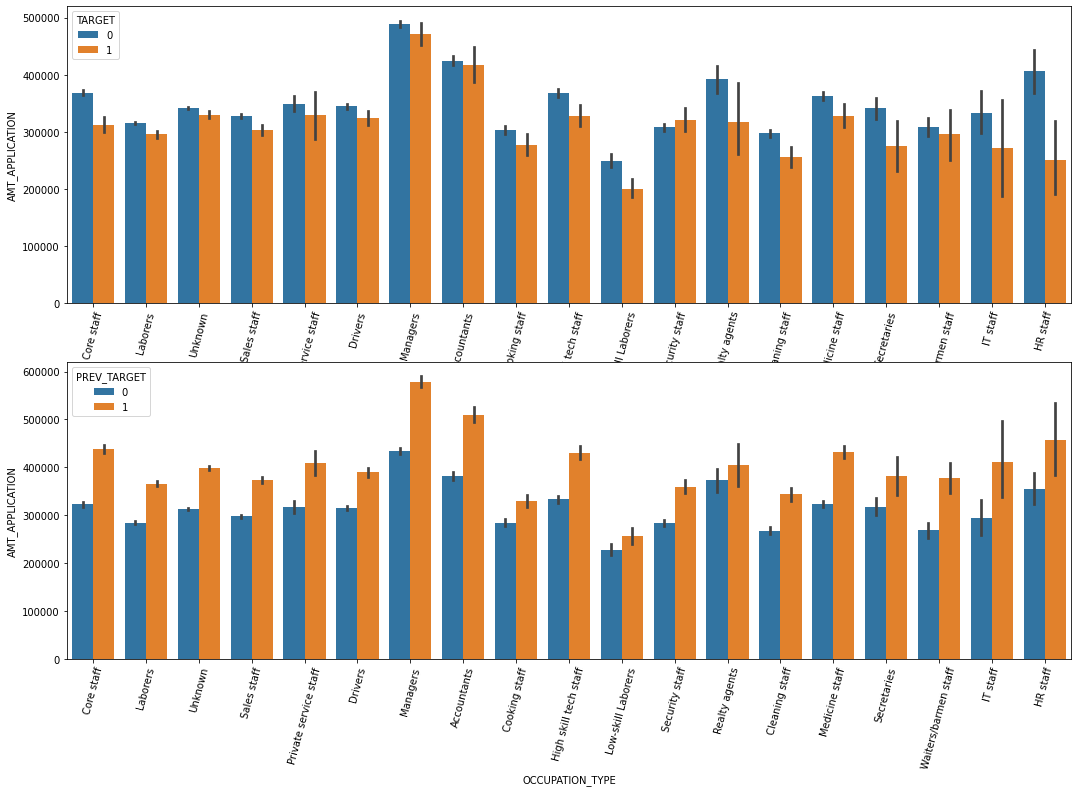

In [174]:
plt.figure(figsize=(18,12))
plt.subplot(2,1, 1)
sns.barplot(x="OCCUPATION_TYPE", y="AMT_APPLICATION", hue="TARGET", data=merged_final)
plt.xticks(rotation = 75)
plt.subplot(2, 1, 2)
sns.barplot(x="OCCUPATION_TYPE", y="AMT_APPLICATION", hue="PREV_TARGET", data=merged_final)
plt.xticks(rotation = 75)


#### Inference - Security staff are likely candidates of default, Managers take more loans

### Outlier Treatment

In [175]:
merged_final.shape

(527063, 44)

Text(0.5, 1.0, 'AMT_INCOME_TOTAL boxplot')

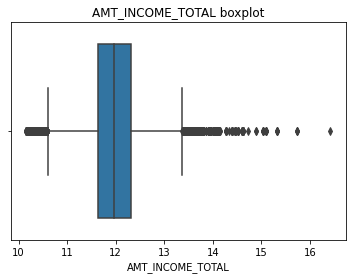

In [176]:
#Check Outlier Using Boxplot
sns.boxplot(np.log(merged_final['AMT_INCOME_TOTAL']))
plt.title('AMT_INCOME_TOTAL boxplot')

In [177]:
# Implementation

Q1 = merged_final['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = merged_final['AMT_INCOME_TOTAL'].quantile(0.75)

IQR = Q3 - Q1

print('Q1 : ', Q1)
print('Q3 : ',Q3)
print('IQR : ',IQR)

Lower_Whisker = Q1 - (1.5 * IQR)
Upper_Whisker = Q3 + (1.5 * IQR)

print('Lower_Whisker: ',Lower_Whisker, 'Upper_Whisker: ',Upper_Whisker)

Q1 :  112500.0
Q3 :  225000.0
IQR :  112500.0
Lower_Whisker:  -56250.0 Upper_Whisker:  393750.0


In [178]:
# Making a copy
merge_copy = merged_final.copy()
merge_copy.shape

(527063, 44)

In [179]:
# Outlier Treatment

# Apply condition to treat outlier
merge_copy = merge_copy[(merge_copy['AMT_INCOME_TOTAL'] < Upper_Whisker)]
merge_copy.shape

(512310, 44)

#### Outliers will be any points below Lower_Whisker or above Upper_Whisker

Text(0.5, 1.0, 'AMT_INCOME_TOTAL boxplot')

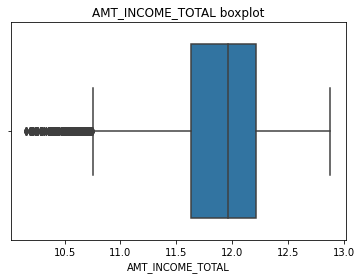

In [180]:
#Check Outlier Using Boxplot
sns.boxplot(np.log(merge_copy['AMT_INCOME_TOTAL']))
plt.title('AMT_INCOME_TOTAL boxplot')

In [181]:
merged_final.groupby('TARGET').agg({'AMT_INCOME_TOTAL': ['mean', 'median', 'count']})

AMT_INCOME_TOTAL                  
                   mean    median   count
TARGET                                   
0         177023.111398  157500.0  476813
1         172042.709015  157500.0   50250

In [182]:
merged_final.groupby('TARGET').agg({'AMT_APPLICATION': ['mean', 'median', 'count']})

AMT_APPLICATION                  
                  mean    median   count
TARGET                                  
0        349587.768538  225000.0  476813
1        322085.101530  225000.0   50250

In [183]:
merged_final.groupby('TARGET').agg({'AMT_CREDIT_Current': ['mean', 'median', 'count']})

AMT_CREDIT_Current                  
                     mean    median   count
TARGET                                     
0           586935.101644  508495.5  476813
1           561578.693284  497520.0   50250

# Conclusion

#### 1. Females take more loan as compared to males, Females are high defaulters when considering  Revolving loans.

#### 2.  People not having own house or flat are higher defaulters.

#### 3. More cash loans are applied and passed by the bank.

#### 4. Higher number of Married people apply for loan.

#### 5. People of Region 2 have higher application for loan.

#### 6. People with education Secondary/ Secondary Special take more loan.

#### 7. Males apply for higher amount of Loan.

#### 8. Labourers and HR Staff are High defaulters

#### 9. People with Academic Degree are High Defaulters.

#### 10. People living in Co-op Apartment are High Defaulters.

#### 11. People with age range 40-60 take more loan, People above 60 years are high defaulters.

#### 12. Security staff are likely candidates of default, Managers take more loans

#### 13. Industry Type 2, 5 12 , Legal Services, Religion are high defaulters of loan

Thankyou :-)

    